    ACCTAGE='Age of Oldest Account'
    DDA='Checking Account'
    DDABAL='Checking Balance'
    DEP='Checking Deposits'
    DEPAMT='Amount Deposited'
    CASHBK='Number Cash Back'
    CHECKS='Number of Checks'
    DIRDEP='Direct Deposit'
    NSF='Number Insufficient Fund'
    NSFAMT='Amount NSF'
    PHONE='Number Telephone Banking'
    TELLER='Teller Visits'
    ATM='ATM'
    ATMAMT='ATM Withdrawal Amount'
    POS='Number Point of Sale'
    POSAMT='Amount Point of Sale'
    CD='Certificate of Deposit'
    CDBAL='CD Balance'
    IRA='Retirement Account'
    IRABAL='IRA Balance'
    LOC='Line of Credit'
    LOCBAL='Line of Credit Balance'
    INV='Investment'
    INVBAL='Investment Balance'
    ILS='Installment Loan'
    ILSBAL='Loan Balance'
    MM='Money Market'
    MMBAL='Money Market Balance'
    MMCRED='Money Market Credits'
    MTG='Mortgage'
    MTGBAL='Mortgage Balance'
    SAV='Saving Account'
    SAVBAL='Saving Balance'
    CC='Credit Card'
    CCBAL='Credit Card Balance'
    CCPURC='Credit Card Purchases'
    SDB='Safety Deposit Box'
    INCOME='Income'
    HMOWN='Owns Home'
    LORES='Length of Residence'
    HMVAL='Home Value'
    AGE='Age'
    CRSCORE='Credit Score'
    MOVED='Recent Address Change'
    INAREA='Local Address'
    INS='Insurance Product'
    BRANCH='Branch of Bank'
    RES='Area Classification’

In [1]:
# Basic packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# To split the data as necessary for modelling
from sklearn.model_selection import train_test_split

# Import different model classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import OneHotEncoder

# To get rid of logistic regression default solver warnings that appear if sklearn hasn't been updated
import warnings
warnings.filterwarnings('ignore')

# Save the model so that we can import it and use it later
import joblib

# To cross-validate
from sklearn.model_selection import cross_val_score

# To set up a temporary directory for caching pipeline results
from tempfile import mkdtemp

# To build a pipeline
from sklearn.pipeline import Pipeline

# To try scaling the data in various ways
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

# To try dimensionality reduction
from sklearn.decomposition import PCA

# To do a cross-validated grid search
from sklearn.model_selection import GridSearchCV

### Part 1: Cleaning

1.What is the size of each data frame? How many rows? How many columns?

In [2]:
df = pd.read_csv('data/cap_bank.csv')
df.head()


ACCTAGE  DDA   DDABAL  DEP   DEPAMT  CASHBK  CHECKS  DIRDEP  NSF  NSFAMT  \
0      0.3    1   419.27    2  1170.06       0       0       0    0     0.0   
1      0.7    1  1986.81    1   446.93       0       1       1    0     0.0   
2      4.1    0     0.00    0     0.00       0       0       0    0     0.0   
3      0.5    1  1594.84    1  1144.24       0       1       0    0     0.0   
4      6.7    1  2813.45    2  1208.94       0       2       0    0     0.0   

   ...  HMOWN  LORES  HMVAL   AGE  CRSCORE  MOVED  INAREA  INS  BRANCH  RES  
0  ...    1.0   11.0   89.0  63.0    696.0      0       1    1     B17    R  
1  ...    1.0    7.0   87.0  51.0    674.0      0       1    0      B2    R  
2  ...    1.0    8.5   97.0  60.0    640.0      0       1    1      B3    S  
3  ...    1.0    7.5  145.0  44.0    672.0      0       1    0      B1    S  
4  ...    1.0    6.0  101.0  46.0    648.0      0       1    1      B1    S  

[5 rows x 48 columns]

In [3]:
df.shape

(32264, 48)

In [4]:
# Check data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32264 entries, 0 to 32263
Data columns (total 48 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ACCTAGE  30194 non-null  float64
 1   DDA      32264 non-null  int64  
 2   DDABAL   32264 non-null  float64
 3   DEP      32264 non-null  int64  
 4   DEPAMT   32264 non-null  float64
 5   CASHBK   32264 non-null  int64  
 6   CHECKS   32264 non-null  int64  
 7   DIRDEP   32264 non-null  int64  
 8   NSF      32264 non-null  int64  
 9   NSFAMT   32264 non-null  float64
 10  PHONE    28131 non-null  float64
 11  TELLER   32264 non-null  int64  
 12  SAV      32264 non-null  int64  
 13  SAVBAL   32264 non-null  float64
 14  ATM      32264 non-null  int64  
 15  ATMAMT   32264 non-null  float64
 16  POS      28131 non-null  float64
 17  POSAMT   28131 non-null  float64
 18  CD       32264 non-null  int64  
 19  CDBAL    32264 non-null  int64  
 20  IRA      32264 non-null  int64  
 21  IRABAL   322

#### Check for duplicates

In [5]:
# Check row duplicates
df.duplicated().sum()

0

In [6]:
# Check column duplicates
df.transpose().duplicated()

ACCTAGE    False
DDA        False
DDABAL     False
DEP        False
DEPAMT     False
CASHBK     False
CHECKS     False
DIRDEP     False
NSF        False
NSFAMT     False
PHONE      False
TELLER     False
SAV        False
SAVBAL     False
ATM        False
ATMAMT     False
POS        False
POSAMT     False
CD         False
CDBAL      False
IRA        False
IRABAL     False
LOC        False
LOCBAL     False
INV        False
INVBAL     False
ILS        False
ILSBAL     False
MM         False
MMBAL      False
MMCRED     False
MTG        False
MTGBAL     False
CC         False
CCBAL      False
CCPURC     False
SDB        False
INCOME     False
HMOWN      False
LORES      False
HMVAL      False
AGE        False
CRSCORE    False
MOVED      False
INAREA     False
INS        False
BRANCH     False
RES        False
dtype: bool

#### Check for null values

In [7]:
# Check nulls in each column
df.isna().sum(axis=0) 

ACCTAGE    2070
DDA           0
DDABAL        0
DEP           0
DEPAMT        0
CASHBK        0
CHECKS        0
DIRDEP        0
NSF           0
NSFAMT        0
PHONE      4133
TELLER        0
SAV           0
SAVBAL        0
ATM           0
ATMAMT        0
POS        4133
POSAMT     4133
CD            0
CDBAL         0
IRA           0
IRABAL        0
LOC           0
LOCBAL        0
INV        4133
INVBAL     4133
ILS           0
ILSBAL        0
MM            0
MMBAL         0
MMCRED        0
MTG           0
MTGBAL        0
CC         4133
CCBAL      4133
CCPURC     4133
SDB           0
INCOME     5782
HMOWN      5533
LORES      5782
HMVAL      5782
AGE        6357
CRSCORE     707
MOVED         0
INAREA        0
INS           0
BRANCH        0
RES           0
dtype: int64

COLUMN: ACCTAGE
percent of nulls: 0.06415819489213985
COLUMN: PHONE
percent of nulls: 0.1280994297049343
COLUMN: POS
percent of nulls: 0.1280994297049343
COLUMN: INV
percent of nulls: 0.1280994297049343
COLUMN: INVBAL
percent of nulls: 0.1280994297049343
COLUMN: POSAMT
percent of nulls: 0.1280994297049343
COLUMN: CC
percent of nulls: 0.1280994297049343
COLUMN: CCBAL
percent of nulls: 0.1280994297049343
COLUMN: HMOWN
percent of nulls: 0.17149144557401438
COLUMN: CCPURC
percent of nulls: 0.1280994297049343
COLUMN: INCOME
percent of nulls: 0.17920902553930076
COLUMN: LORES
percent of nulls: 0.17920902553930076
COLUMN: HMVAL
percent of nulls: 0.17920902553930076
COLUMN: AGE
percent of nulls: 0.19703074634267295
COLUMN: CRSCORE
percent of nulls: 0.021912968013885446


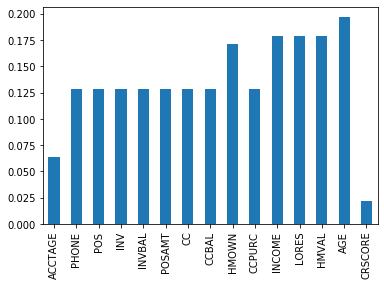

In [8]:
# Visualize percentage of nulls in each column
columns_with_null = ['ACCTAGE', 'PHONE', 'POS','INV','INVBAL','POSAMT', 'CC', 'CCBAL','HMOWN',
                    'CCPURC', 'INCOME', 'LORES', 'HMVAL', 'AGE','CRSCORE']

(df[columns_with_null].isna().sum() / len(df)).plot(kind='bar')


for col in columns_with_null:
    
    print('COLUMN:', col)
    print('percent of nulls:', df[col].isna().sum()/len(df)) 

### Columns containing missing values:

    ACCTAGE: Age of Oldest Account
    PHONE: Number of Telephone Bnaking
    POS: Number Point of Sale
    INV: Investment
    INVBAL: Investment Balance
    POSMAT: Amount Point of Sale
    CC: Credit Card
    CCBAL: Credit Card Balance
    HMOEN: Owns Home
    CCPURC: Credit Card Purchase
    INCOME: Income
    LORES: Length Of Residence
    HMVAL: Home Value
    AGE: Age
    CRSCORE: Credit Score

### Column-by-Column exploration and cleaning

In [9]:
columns_with_null = ['ACCTAGE', 'PHONE', 'POS','INV','INVBAL','POSAMT', 'CC', 'CCBAL','HMOWN',
                    'CCPURC', 'LORES', 'AGE','CRSCORE','HMVAL']

for col in columns_with_null:
    df[col].fillna(df[col].median(), inplace=True) # Impute null values with median

In [10]:
df.isna().sum(axis=0) 

ACCTAGE       0
DDA           0
DDABAL        0
DEP           0
DEPAMT        0
CASHBK        0
CHECKS        0
DIRDEP        0
NSF           0
NSFAMT        0
PHONE         0
TELLER        0
SAV           0
SAVBAL        0
ATM           0
ATMAMT        0
POS           0
POSAMT        0
CD            0
CDBAL         0
IRA           0
IRABAL        0
LOC           0
LOCBAL        0
INV           0
INVBAL        0
ILS           0
ILSBAL        0
MM            0
MMBAL         0
MMCRED        0
MTG           0
MTGBAL        0
CC            0
CCBAL         0
CCPURC        0
SDB           0
INCOME     5782
HMOWN         0
LORES         0
HMVAL         0
AGE           0
CRSCORE       0
MOVED         0
INAREA        0
INS           0
BRANCH        0
RES           0
dtype: int64

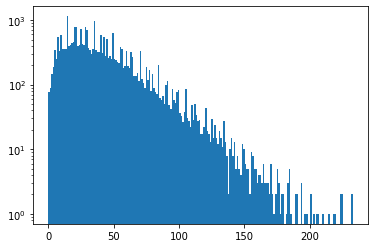

In [11]:
# Check the distribution of Income
plt.figure()
plt.hist(df['INCOME'], bins=200)
plt.yscale('log')
plt.show() 

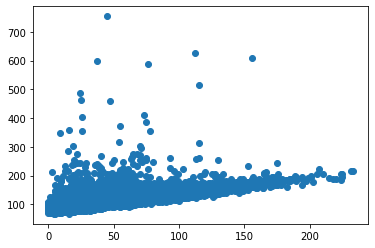

In [12]:
# Check the liner relationship between Income and Home Value. 
plt.figure()
plt.scatter(df['INCOME'],df['HMVAL']) 
plt.show()

The scatter plot shows these two variables do have positive correlation. So we will impute their null values based on their relative percentage values.

In [13]:
# Check INCOME as a proportion of HMVAL and get the median value
INC_pct = df['INCOME']/df['HMVAL'] 
INC_pct[np.isfinite(INC_pct)].median()  

0.31896551724137934

So based upon the above, we will impute INCOME that remain with ~0.319 * the HMVAL column.

In [14]:
# Impute the missing values of INCOME with the median of INC_pct
df.loc[df['INCOME'].isna(),'INCOME']=df.loc[df['INCOME'].isna(),'DDA']*0.319

In [15]:
# Check nulls in INCOME column. It shows we successfully impute the missing values in this column.
df['INCOME'].isna().sum(axis=0) 

0

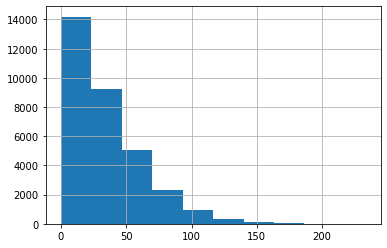

In [16]:
# Check the distribution of INCOME column again after imputation
df['INCOME'].hist()
#plt.yscale('log')

In [17]:
# Make sure there is no more nulls in each column 
df.isna().sum(axis=0) 

ACCTAGE    0
DDA        0
DDABAL     0
DEP        0
DEPAMT     0
CASHBK     0
CHECKS     0
DIRDEP     0
NSF        0
NSFAMT     0
PHONE      0
TELLER     0
SAV        0
SAVBAL     0
ATM        0
ATMAMT     0
POS        0
POSAMT     0
CD         0
CDBAL      0
IRA        0
IRABAL     0
LOC        0
LOCBAL     0
INV        0
INVBAL     0
ILS        0
ILSBAL     0
MM         0
MMBAL      0
MMCRED     0
MTG        0
MTGBAL     0
CC         0
CCBAL      0
CCPURC     0
SDB        0
INCOME     0
HMOWN      0
LORES      0
HMVAL      0
AGE        0
CRSCORE    0
MOVED      0
INAREA     0
INS        0
BRANCH     0
RES        0
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32264 entries, 0 to 32263
Data columns (total 48 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ACCTAGE  32264 non-null  float64
 1   DDA      32264 non-null  int64  
 2   DDABAL   32264 non-null  float64
 3   DEP      32264 non-null  int64  
 4   DEPAMT   32264 non-null  float64
 5   CASHBK   32264 non-null  int64  
 6   CHECKS   32264 non-null  int64  
 7   DIRDEP   32264 non-null  int64  
 8   NSF      32264 non-null  int64  
 9   NSFAMT   32264 non-null  float64
 10  PHONE    32264 non-null  float64
 11  TELLER   32264 non-null  int64  
 12  SAV      32264 non-null  int64  
 13  SAVBAL   32264 non-null  float64
 14  ATM      32264 non-null  int64  
 15  ATMAMT   32264 non-null  float64
 16  POS      32264 non-null  float64
 17  POSAMT   32264 non-null  float64
 18  CD       32264 non-null  int64  
 19  CDBAL    32264 non-null  int64  
 20  IRA      32264 non-null  int64  
 21  IRABAL   322

There are only two variables BRANCH and RES are categorical.

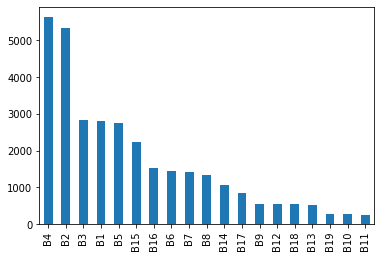

B4     5633
B2     5345
B3     2844
B1     2819
B5     2752
B15    2235
B16    1534
B6     1438
B7     1413
B8     1341
B14    1072
B17     850
B9      558
B12     549
B18     541
B13     535
B19     285
B10     273
B11     247
Name: BRANCH, dtype: int64

In [19]:
# Check the distribution of BRANCH values
df['BRANCH'].value_counts().plot(kind='bar') 
plt.show()

display(df['BRANCH'].value_counts())

BRANCH has almost 20 imbalanced values. In this project, we don't care about which branch has the most powerful predictive power so we drop variable BRANCH. INS is the target variable, so we need to drop it since this is a clustering problem and we don't predict anything but try to find the underlying pattern of the data points.

In [20]:
# dropping BRANCH and target variable INS
df.drop(['BRANCH','INS'], axis=1, inplace=True)

Let's encode categorical variable RES with numeric labels.

In [21]:
# Check unique values of RES column
df['RES'].unique()

array(['R', 'S', 'U'], dtype=object)

In [22]:
# Replace values in the RES column with 1,2,3
df['RES'].replace({'R':1, 'S':2, 'U':3}, inplace=True)

In [23]:
# Check again
df['RES'].unique()

array([1, 2, 3])

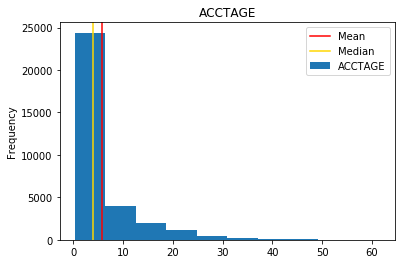

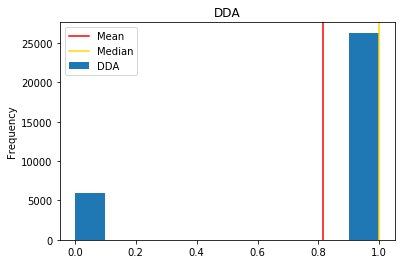

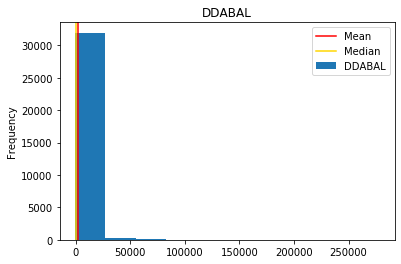

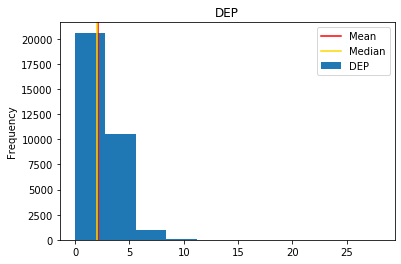

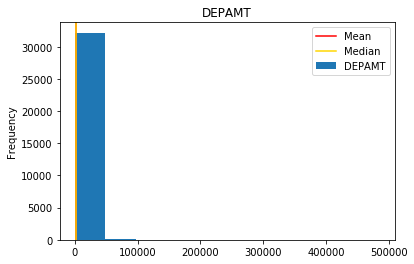

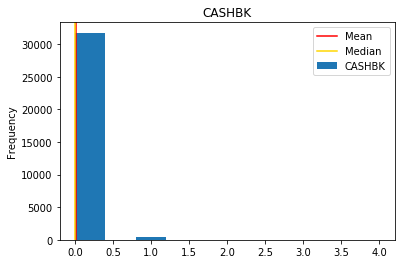

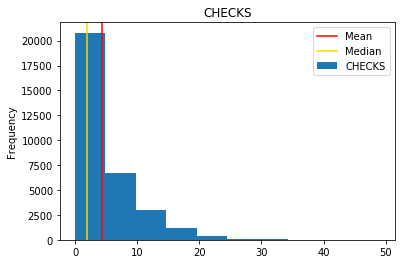

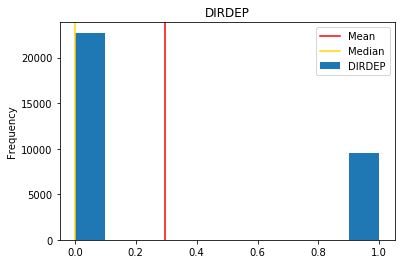

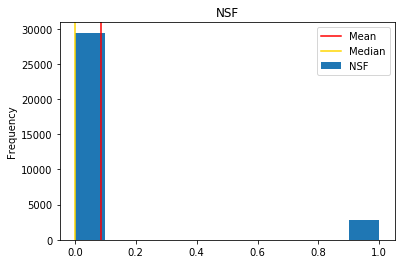

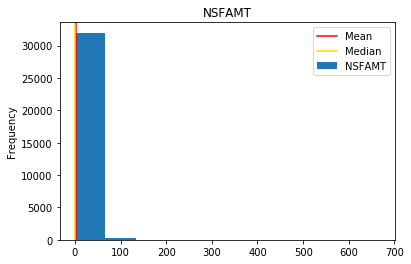

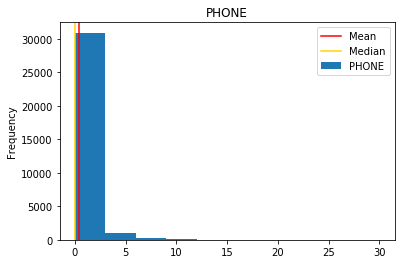

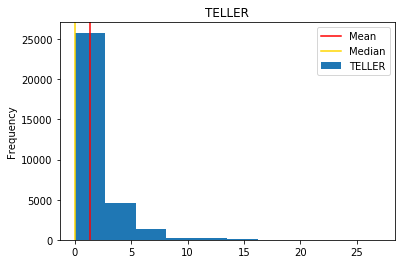

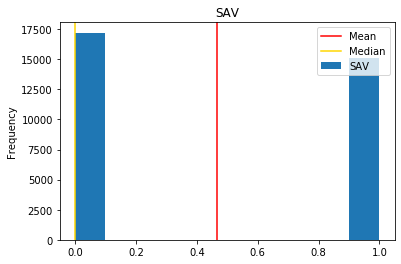

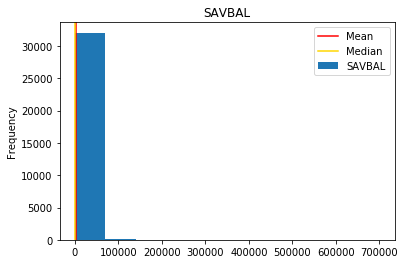

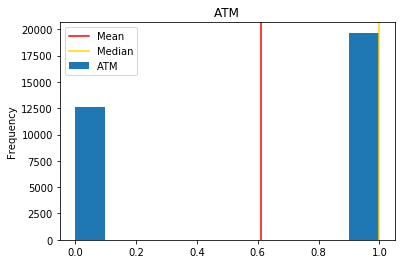

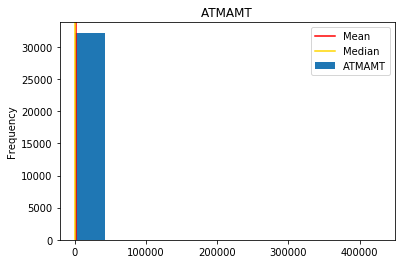

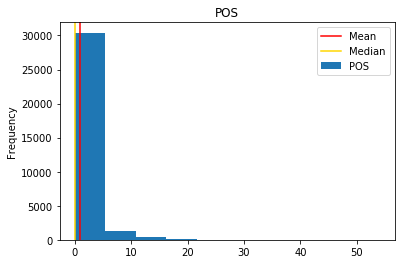

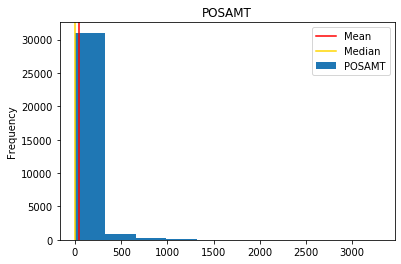

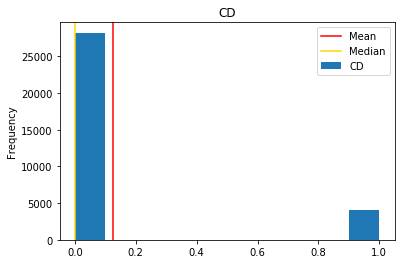

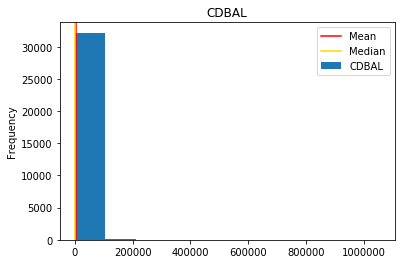

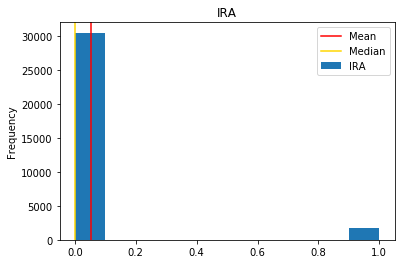

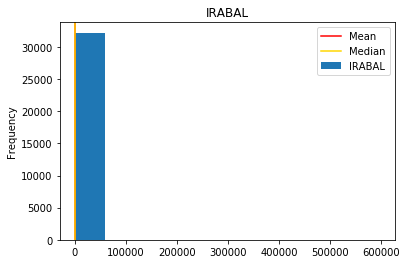

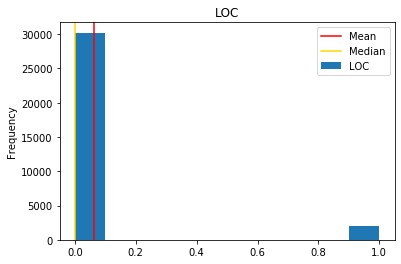

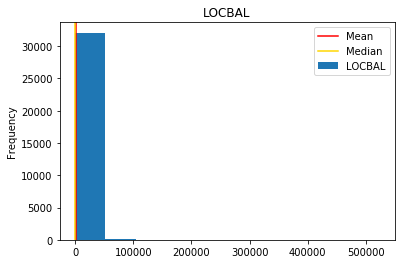

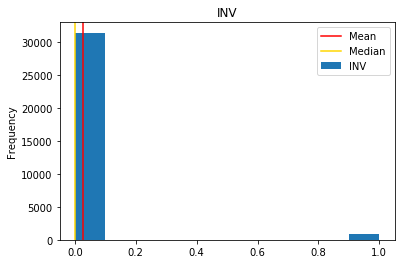

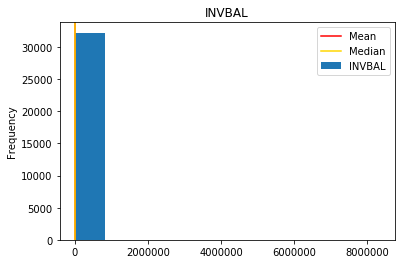

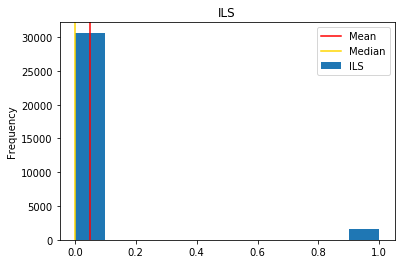

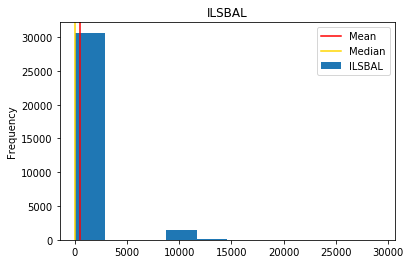

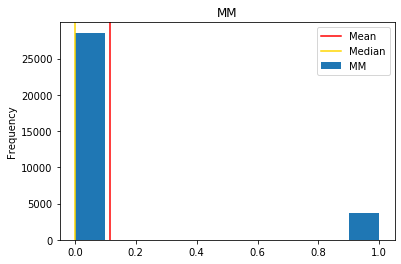

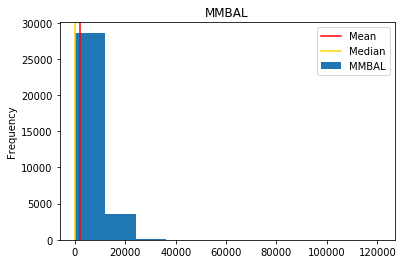

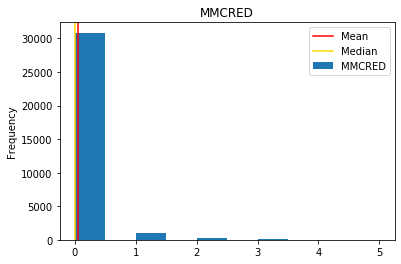

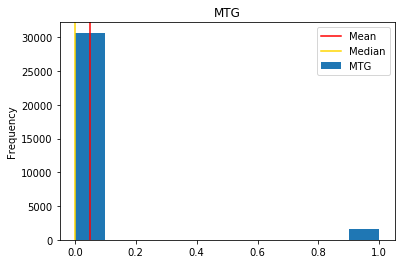

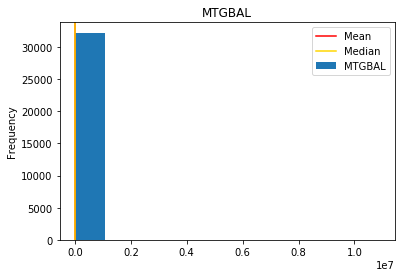

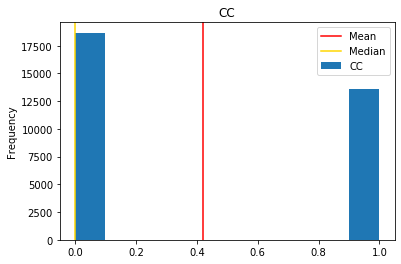

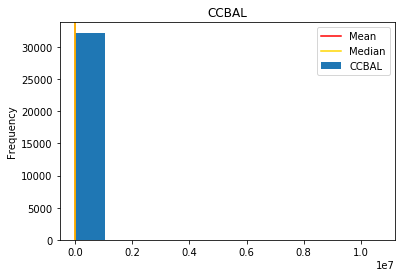

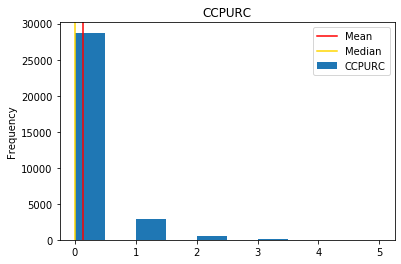

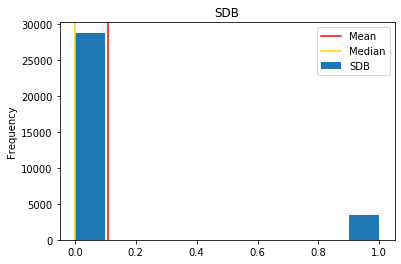

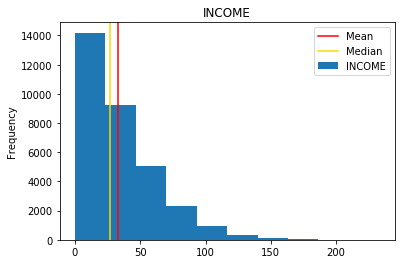

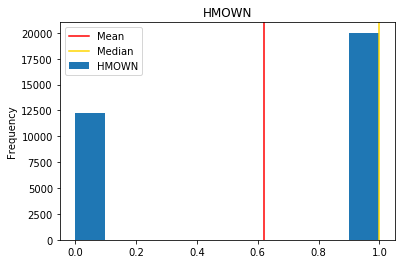

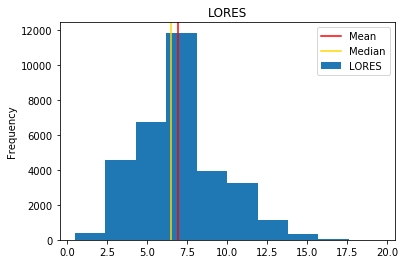

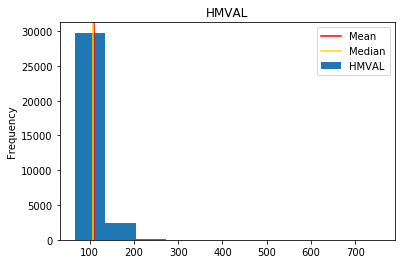

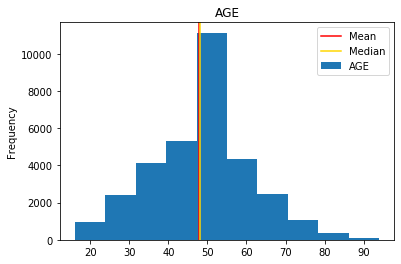

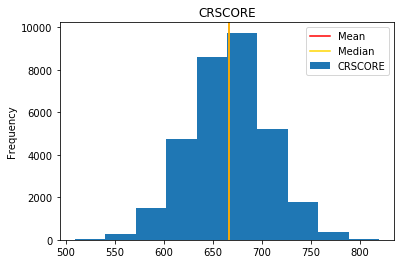

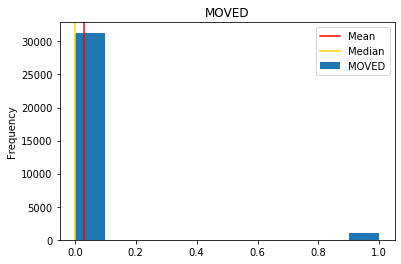

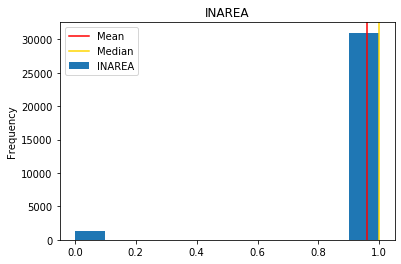

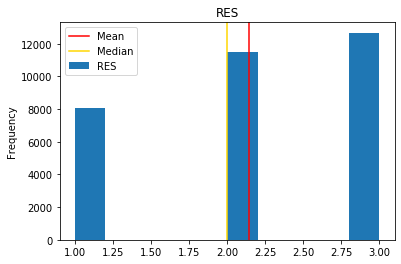

In [24]:
# Check distributions of all columns
num_columns = ['ACCTAGE', 'DDA', 'DDABAL', 'DEP', 'DEPAMT', 'CASHBK', 'CHECKS',
              'DIRDEP', 'NSF', 'NSFAMT', 'PHONE', 'TELLER', 'SAV', 'SAVBAL', 'ATM',
              'ATMAMT', 'POS', 'POSAMT', 'CD', 'CDBAL', 'IRA', 'IRABAL', 'LOC',
              'LOCBAL', 'INV', 'INVBAL', 'ILS', 'ILSBAL', 'MM', 'MMBAL', 'MMCRED',
              'MTG', 'MTGBAL', 'CC', 'CCBAL', 'CCPURC', 'SDB', 'INCOME', 'HMOWN',
              'LORES', 'HMVAL', 'AGE', 'CRSCORE', 'MOVED', 'INAREA','RES']

for col in num_columns:
    df[col].plot(kind='hist')
    plt.axvline(df[col].mean(), c='r', label='Mean') 
    plt.axvline(df[col].median(), c='gold', label='Median')
    plt.title(col)
    plt.legend()
    plt.show()
    

Looking at the data we can see that the data that only a few of our numeric columns follow a normal distribution. This in itself is not a major issue for our modelling process. Usually having a normal distribution of features translates well to well behaved errors but its not a hard requirement.

In [25]:
# Check data type again. It shows all the columns are numeric.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32264 entries, 0 to 32263
Data columns (total 46 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ACCTAGE  32264 non-null  float64
 1   DDA      32264 non-null  int64  
 2   DDABAL   32264 non-null  float64
 3   DEP      32264 non-null  int64  
 4   DEPAMT   32264 non-null  float64
 5   CASHBK   32264 non-null  int64  
 6   CHECKS   32264 non-null  int64  
 7   DIRDEP   32264 non-null  int64  
 8   NSF      32264 non-null  int64  
 9   NSFAMT   32264 non-null  float64
 10  PHONE    32264 non-null  float64
 11  TELLER   32264 non-null  int64  
 12  SAV      32264 non-null  int64  
 13  SAVBAL   32264 non-null  float64
 14  ATM      32264 non-null  int64  
 15  ATMAMT   32264 non-null  float64
 16  POS      32264 non-null  float64
 17  POSAMT   32264 non-null  float64
 18  CD       32264 non-null  int64  
 19  CDBAL    32264 non-null  int64  
 20  IRA      32264 non-null  int64  
 21  IRABAL   322

<Figure size 432x288 with 0 Axes>

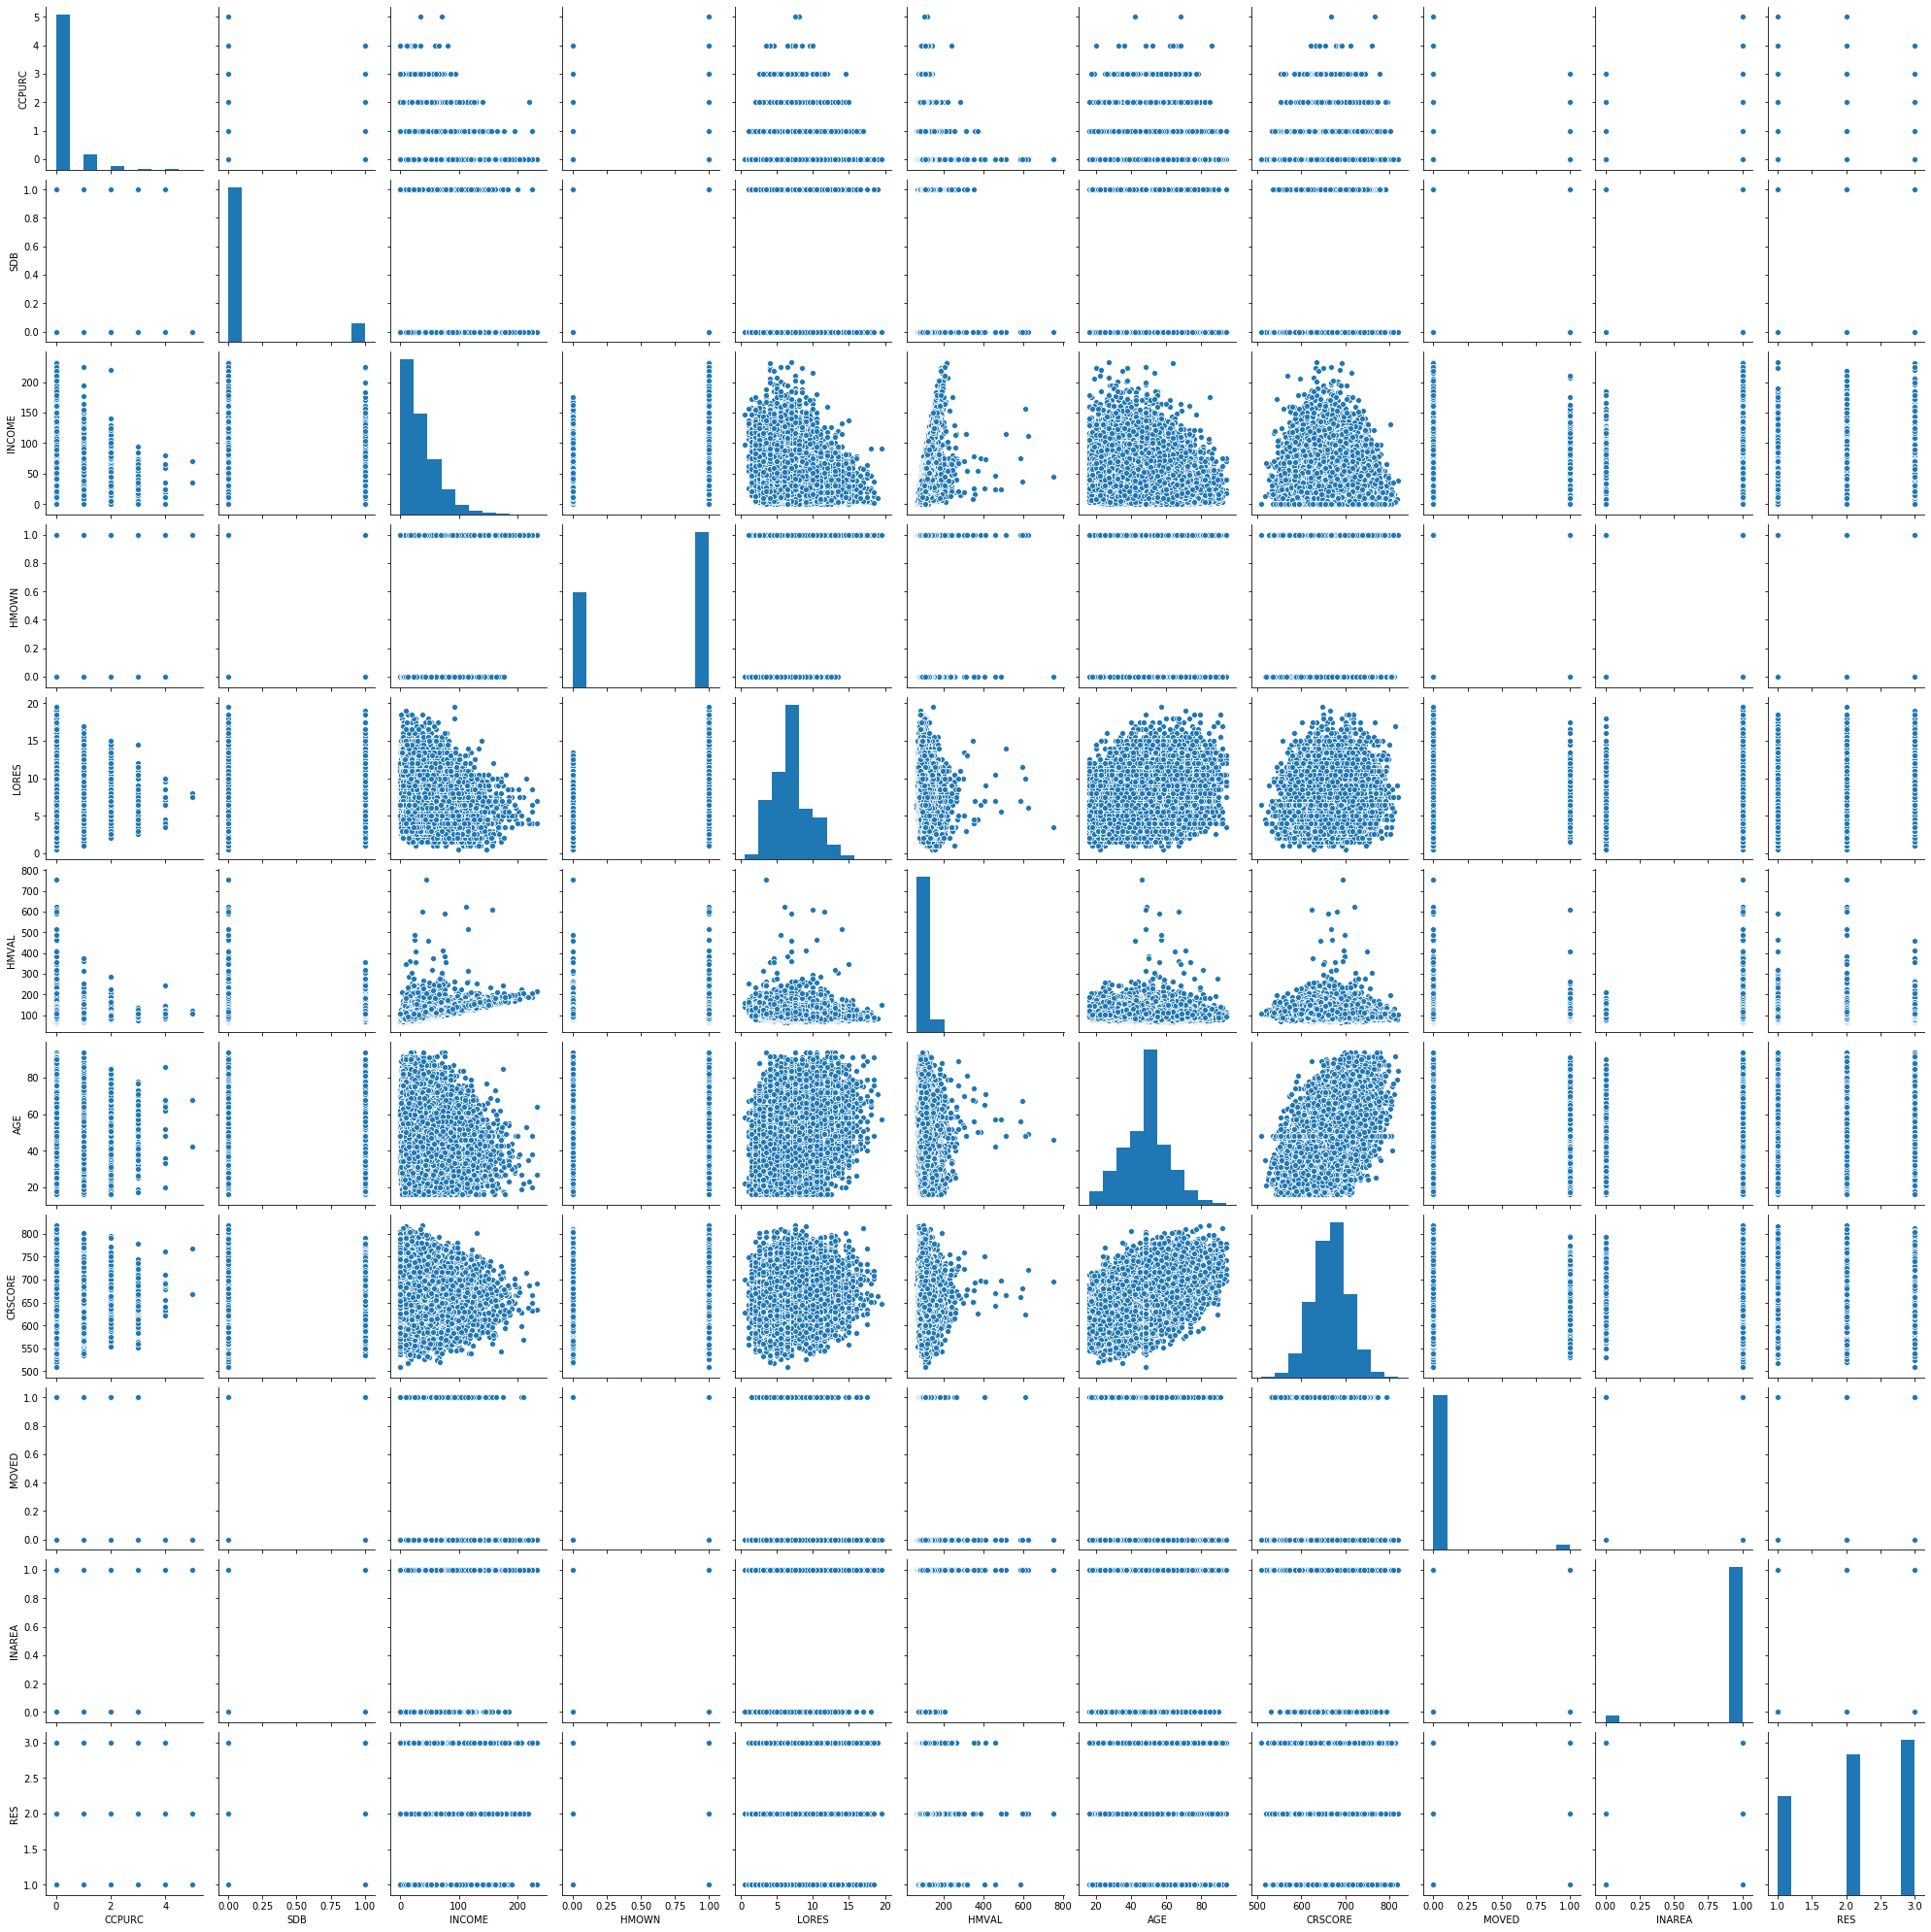

In [26]:
# Exploratory Data Analysis
import seaborn as sns
plt.figure()
sns.pairplot(df.iloc[:, 35:]) # just see the liner relationship between the last several columns

In [27]:
df.isna().sum()

ACCTAGE    0
DDA        0
DDABAL     0
DEP        0
DEPAMT     0
CASHBK     0
CHECKS     0
DIRDEP     0
NSF        0
NSFAMT     0
PHONE      0
TELLER     0
SAV        0
SAVBAL     0
ATM        0
ATMAMT     0
POS        0
POSAMT     0
CD         0
CDBAL      0
IRA        0
IRABAL     0
LOC        0
LOCBAL     0
INV        0
INVBAL     0
ILS        0
ILSBAL     0
MM         0
MMBAL      0
MMCRED     0
MTG        0
MTGBAL     0
CC         0
CCBAL      0
CCPURC     0
SDB        0
INCOME     0
HMOWN      0
LORES      0
HMVAL      0
AGE        0
CRSCORE    0
MOVED      0
INAREA     0
RES        0
dtype: int64

Log scale columns containing negative values:

-774.83


(array([1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 4.0000e+00,
        2.0481e+04, 9.1820e+03, 2.1740e+03, 3.7900e+02, 4.3000e+01]),
 array([ 0.        ,  1.25384998,  2.50769996,  3.76154993,  5.01539991,
         6.26924989,  7.52309987,  8.77694985, 10.03079983, 11.2846498 ,
        12.53849978]),
 <a list of 10 Patch objects>)

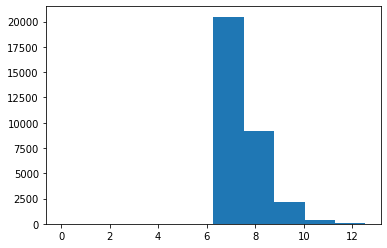

In [30]:
print(df['DDABAL'].min())

plt.hist(np.log(df['DDABAL'] - df['DDABAL'].min()+1))

-613.0


(array([1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 3.0598e+04,
        2.8200e+02, 4.4300e+02, 6.5300e+02, 2.5900e+02, 2.8000e+01]),
 array([ 0.        ,  1.31687912,  2.63375824,  3.95063736,  5.26751648,
         6.58439561,  7.90127473,  9.21815385, 10.53503297, 11.85191209,
        13.16879121]),
 <a list of 10 Patch objects>)

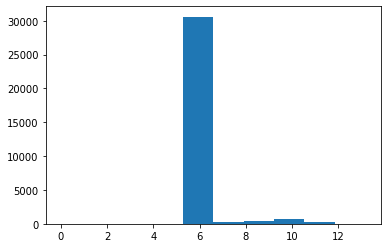

In [31]:
print(df['LOCBAL'].min())
plt.hist(np.log(df['LOCBAL'] - df['LOCBAL'].min()+1))

-2214.92


(array([1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 3.18e+04, 1.65e+02,
        2.01e+02, 7.10e+01, 2.40e+01, 2.00e+00]),
 array([ 0.        ,  1.59348951,  3.18697903,  4.78046854,  6.37395806,
         7.96744757,  9.56093708, 11.1544266 , 12.74791611, 14.34140563,
        15.93489514]),
 <a list of 10 Patch objects>)

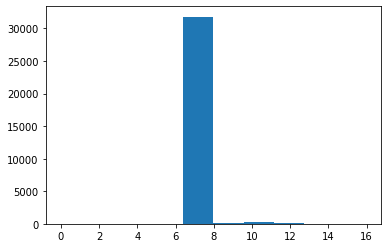

In [32]:
print(df['INVBAL'].min())
plt.hist(np.log(df['INVBAL'] - df['INVBAL'].min()+1))

-2060.51


(array([1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 2.6961e+04,
        3.1000e+03, 1.2400e+03, 8.9500e+02, 6.4000e+01, 2.0000e+00]),
 array([ 0.        ,  1.61804521,  3.23609041,  4.85413562,  6.47218083,
         8.09022604,  9.70827124, 11.32631645, 12.94436166, 14.56240686,
        16.18045207]),
 <a list of 10 Patch objects>)

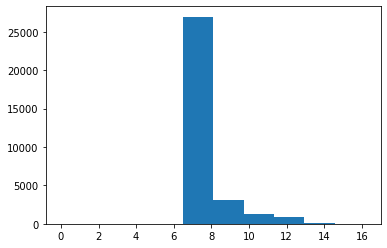

In [33]:
print(df['CCBAL'].min())
plt.hist(np.log(df['CCBAL'] - df['CCBAL'].min()+1))

In [28]:
# Sanity check
df.isna().sum()

ACCTAGE    0
DDA        0
DDABAL     0
DEP        0
DEPAMT     0
CASHBK     0
CHECKS     0
DIRDEP     0
NSF        0
NSFAMT     0
PHONE      0
TELLER     0
SAV        0
SAVBAL     0
ATM        0
ATMAMT     0
POS        0
POSAMT     0
CD         0
CDBAL      0
IRA        0
IRABAL     0
LOC        0
LOCBAL     0
INV        0
INVBAL     0
ILS        0
ILSBAL     0
MM         0
MMBAL      0
MMCRED     0
MTG        0
MTGBAL     0
CC         0
CCBAL      0
CCPURC     0
SDB        0
INCOME     0
HMOWN      0
LORES      0
HMVAL      0
AGE        0
CRSCORE    0
MOVED      0
INAREA     0
RES        0
dtype: int64

In [29]:
#df2.columns 

In [30]:
#plt.figure()
#plt.hist(X[:, -9], bins=100) #  'INCOME' is in the ninth last column
#plt.yscale('log')
#plt.show()   

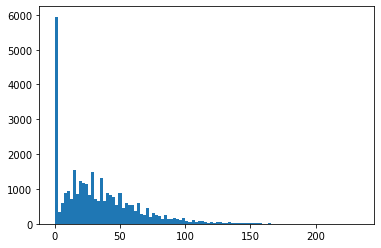

In [31]:
plt.figure()
plt.hist(df['INCOME'], bins=100)
#plt.yscale('log')
plt.show() 

In [32]:
# Check outliers of INCOME
#boxplot = df2.boxplot(column=['INCOME'])

In [33]:
# checking quantile to see how many outliers we have
#print(f'Upper quantile threshold: ', df2['INCOME'].quantile(0.95)) 
#print(f'Lower quantile threshold: ', df2['INCOME'].quantile(0.05))


In [34]:
# Exclude outliers using boolean indexing
#df2[(df2['INCOME'] < 4.52) & (df2['INCOME'] > 0.28)]  

In [35]:
# Check the distribution of INCOME again
#plt.figure()
#plt.hist(df2['INCOME'], bins=30)
#plt.yscale('log')
#plt.show()   

The distribution looks more normal, however we see some strange patterns, and also some outliers. We now move on to clustering - if results were very, very, sub-optimal, we could return and investigate alternative data cleaning and imputation choices.

### **Clustering**

Let's use some of the **clustering methods** on this data set. For each, we'll have to decide how many clusters would be appropriate.

***Unsupervised Learning: No Y variable, No data split, No cv, No prediction. But need scale data, find patterns in the data, assign labels and merge them back to the orginal data.***

#### - K-means 

In [36]:
# Scale
from sklearn.preprocessing import StandardScaler

my_ss = StandardScaler()

X = my_ss.fit_transform(df)

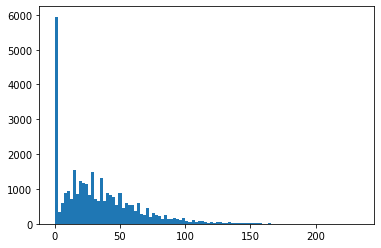

In [37]:
plt.figure()
plt.hist(df['INCOME'], bins=100) 
plt.show()  

In [38]:
# Tools
from sklearn.cluster import KMeans

# We will explore different values for k, and look at the scree plot ('elbow method') using WSS distance (inertia)

ks = np.arange(1, 21)
inertia_list = list()

for k in ks:

    # Instantiate
    my_kmeans = KMeans(n_clusters=k) # try different numbers and let elbow pick the best one
    
    # Fit (i.e. get clusters)
    my_kmeans.fit(X) # pass all scaled data X in
    
    # Append inertia
    inertia_list.append(my_kmeans.inertia_)

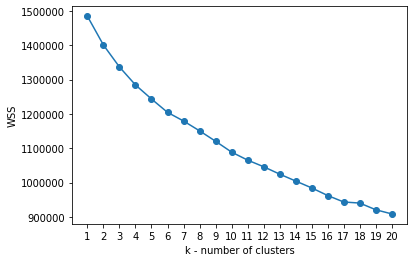

In [39]:
# Visualize the scree plot
plt.figure()
plt.plot(ks, inertia_list, marker='o')
plt.xlabel('k - number of clusters')
plt.ylabel('WSS')
plt.xticks(ks)
plt.show()

Looks like there is not a clearly-defined 'elbow' - let us explore other metrics such as **silhouette score** to evaluate further for clustering evaluation.

In [40]:
from sklearn.metrics import silhouette_score

ks = np.arange(2, 11) #  silhouette score needs at least two clusters to measure between
silhouette_list = list()

for k in ks:

    # Instantiate
    my_kmeans = KMeans(n_clusters=k) # calculate the mean distance between clusters
    
    # Fit (i.e. get clusters)
    my_kmeans.fit(X)
    
    # Append silhouette
    silhouette = silhouette_score(X, my_kmeans.labels_) # calculate the mean silhouette score for each k
    silhouette_list.append(silhouette)                  
    print(k)

2
3
4
5
6
7
8
9
10


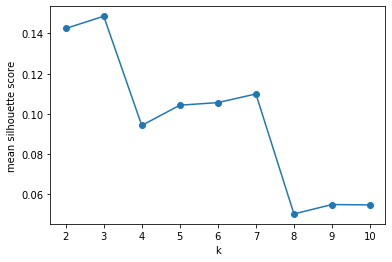

In [41]:
plt.figure()
plt.plot(ks, silhouette_list, marker='o')
plt.xlabel('k')
plt.ylabel('mean silhouette score')
plt.xticks(ks)
plt.show()

Greater silhouette score indicates better separation of points in clusters to their neighboring or nearby clusters. It appears again that k=3 seems to be a good choice.


#### - Hierarchical Clustering

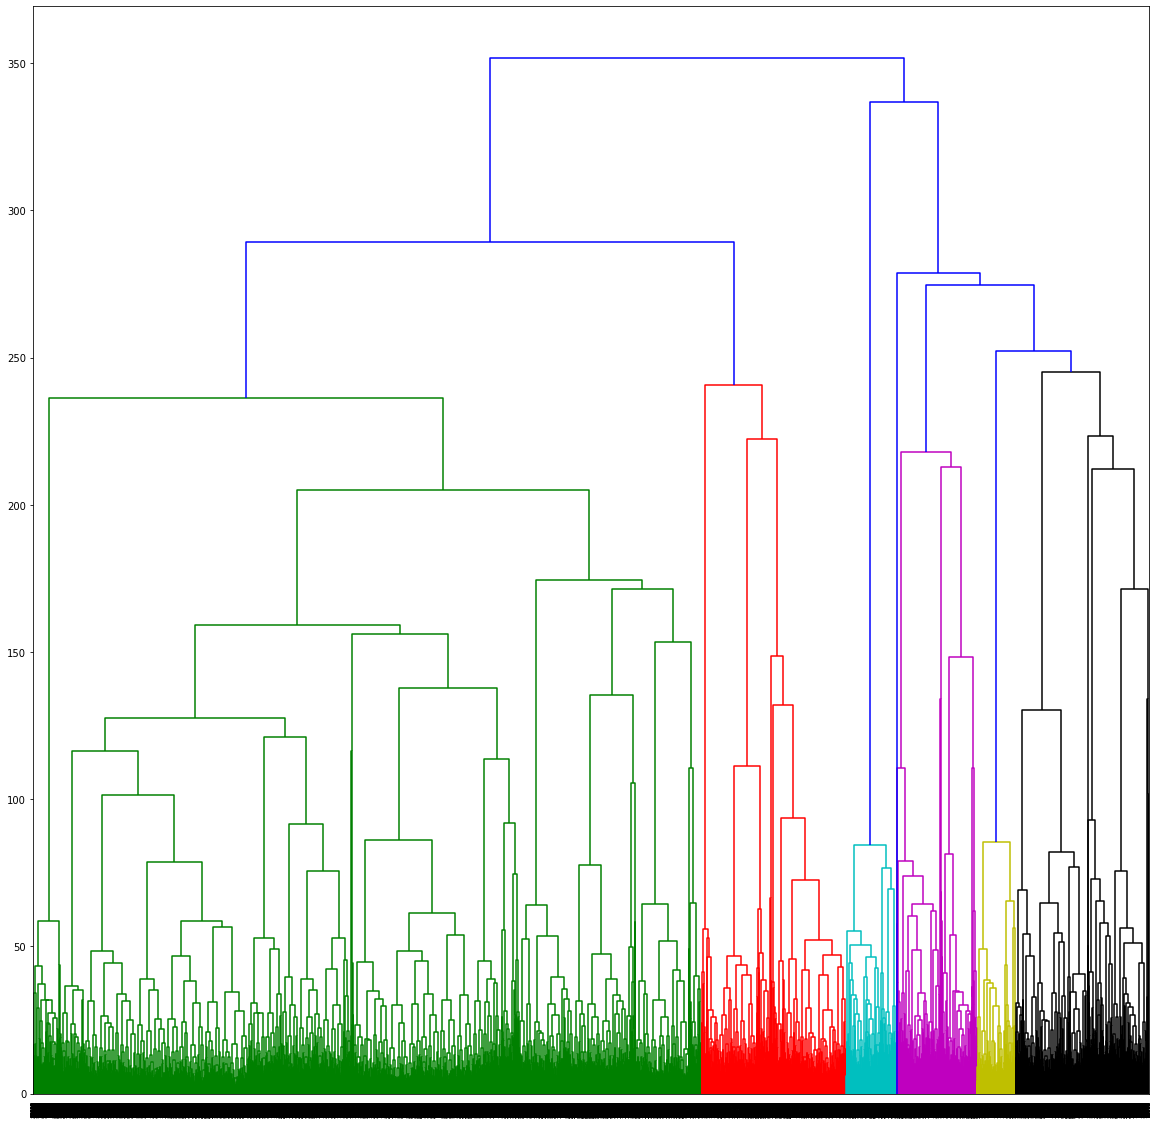

In [42]:
# Look at a dendogram for hierarchical 
from scipy.cluster.hierarchy import linkage, dendrogram

# Use Ward
linkage_mat = linkage(X, 'ward')

# Look at scoring as well
plt.figure(figsize=(20,20))
dendrogram(linkage_mat)
plt.show()

In [43]:
linkage_mat

array([[3.44200000e+03, 7.79900000e+03, 2.95914829e-02, 2.00000000e+00],
       [9.40500000e+03, 1.63210000e+04, 2.95914829e-02, 2.00000000e+00],
       [1.07740000e+04, 1.81400000e+04, 2.98397372e-02, 2.00000000e+00],
       ...,
       [6.45180000e+04, 6.45190000e+04, 2.89237194e+02, 2.35120000e+04],
       [6.44790000e+04, 6.45230000e+04, 3.36707779e+02, 8.75200000e+03],
       [6.45240000e+04, 6.45250000e+04, 3.51705448e+02, 3.22640000e+04]])

In [44]:
# Try different clustering for agglomerative
from sklearn.cluster import AgglomerativeClustering

ks = np.arange(2, 6)
silhouette_list = list()

for k in ks:
    
    # Instantiate
    my_hclust = AgglomerativeClustering(n_clusters=k, linkage='ward')
    
    # Fit
    my_hclust.fit(X)
    
    # Calculate score
    silhouette = silhouette_score(X, my_hclust.labels_) # silhouette score is a mertic to identify how many optimal
    silhouette_list.append(silhouette)                  # clusters in Unsupervised Learning
    print(k, end=' ')

2 3 4 5 

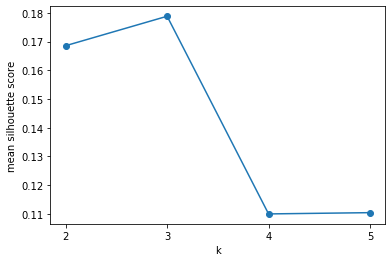

In [45]:
plt.figure()
plt.plot(ks, silhouette_list, marker='o')
plt.xlabel('k')
plt.ylabel('mean silhouette score')
plt.xticks(ks)
plt.show()

We can see in the above that 3 clusters appears to be optimal for this data, a range of behavior for 4 to 8 clusters appear poor performance.

### Comparing Found Groups (Post-Cluster Analysis)

We now need to explore the found groups. We will look at:

- How similar are the results between the different clustering algorithms?
- For each clustering result, what are the main differences between the found groups?
- Are the found groups statistically different from each other?
- Based on the exploration of the found groups, what are the characteristic of each group? Do they represent some type of customer?

#### K-MEANS

In [46]:
# Look at the results for our k-means example
from sklearn.cluster import KMeans

# Pick final the clustering model
kmeans_final = KMeans(n_clusters=3) # plug in the optimal cluster = 3 (based on the highest silhouette scores)

# Assign labels
kmeans_final.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [47]:
# Cluster labels
kmeans_final.labels_  # 3 clusters

array([1, 1, 2, ..., 1, 2, 2], dtype=int32)

In [48]:
kmeans_final.labels_.shape # shape of labels

(32264,)

In [49]:
df.shape # same shape as df

(32264, 46)

In [50]:
df2 = df.copy()
df2['kcluster'] = kmeans_final.labels_ # attach the labels back to the orginal dataset
                                         # new feature 'cluster'

In [51]:
df2.head()

ACCTAGE  DDA   DDABAL  DEP   DEPAMT  CASHBK  CHECKS  DIRDEP  NSF  NSFAMT  \
0      0.3    1   419.27    2  1170.06       0       0       0    0     0.0   
1      0.7    1  1986.81    1   446.93       0       1       1    0     0.0   
2      4.1    0     0.00    0     0.00       0       0       0    0     0.0   
3      0.5    1  1594.84    1  1144.24       0       1       0    0     0.0   
4      6.7    1  2813.45    2  1208.94       0       2       0    0     0.0   

   ...  INCOME  HMOWN  LORES  HMVAL   AGE  CRSCORE  MOVED  INAREA  RES  \
0  ...    16.0    1.0   11.0   89.0  63.0    696.0      0       1    1   
1  ...     4.0    1.0    7.0   87.0  51.0    674.0      0       1    1   
2  ...    30.0    1.0    8.5   97.0  60.0    640.0      0       1    2   
3  ...   125.0    1.0    7.5  145.0  44.0    672.0      0       1    2   
4  ...    25.0    1.0    6.0  101.0  46.0    648.0      0       1    2   

   kcluster  
0         1  
1         1  
2         2  
3         1  
4         1  

[5 rows x 47 columns]

<Figure size 432x288 with 0 Axes>

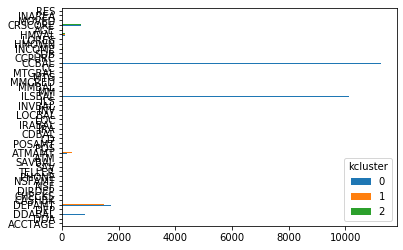

In [52]:
# Evaluate
# Compare 3 clusters using groupby

plt.figure()
df2.groupby('kcluster').median().transpose().plot(kind='barh') # defualt 'bar' is vertical
plt.show()



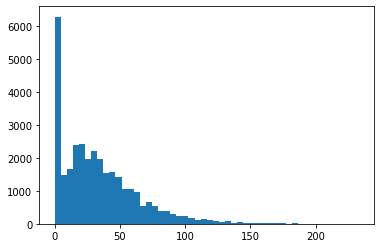

In [53]:
plt.figure()
plt.hist(df['INCOME'], bins=50) # compare to the orginal distribution of 'INCOME'
plt.show()

In [54]:
cluster0 = df2[df2['kcluster']==0]
cluster1 = df2[df2['kcluster']==1]
cluster2 = df2[df2['kcluster']==2]

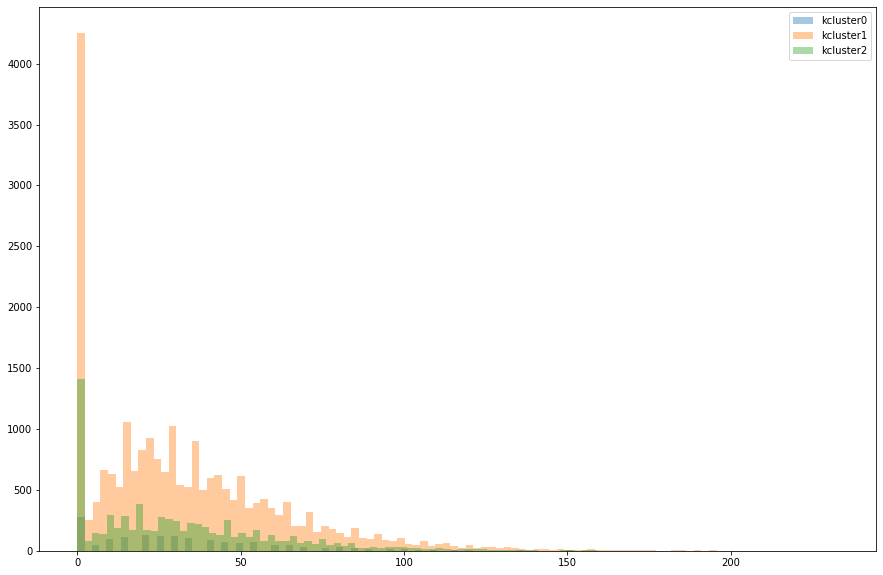

In [55]:
plt.figure(figsize=(15,10))
plt.hist(cluster0['INCOME'], bins=100, alpha=0.4) 
plt.hist(cluster1['INCOME'], bins=100, alpha=0.4)
plt.hist(cluster2['INCOME'], bins=100, alpha=0.4)
plt.legend(['kcluster0','kcluster1','kcluster2'])#different behaviours of three clusters of customers on INCOME
plt.show()    

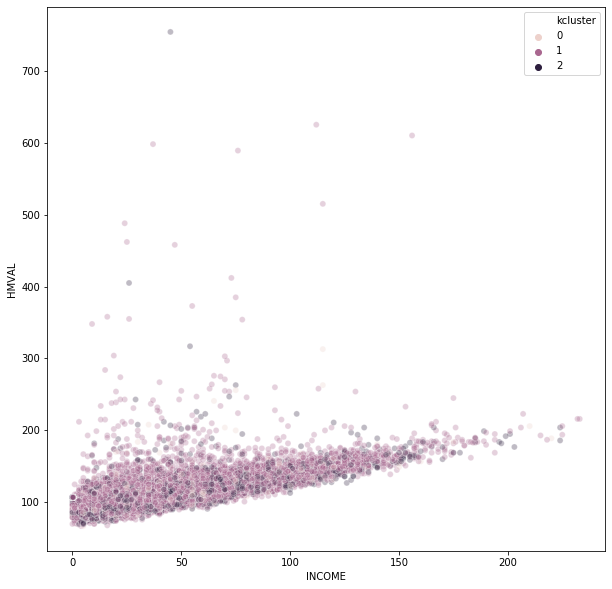

In [56]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x='INCOME', y='HMVAL', hue='kcluster', data=df2, alpha=0.3)

In [57]:
len(df2.columns)

47

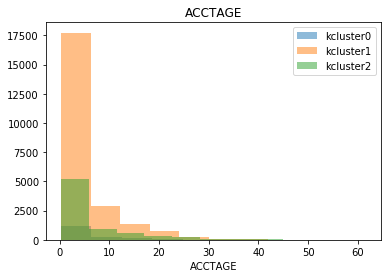

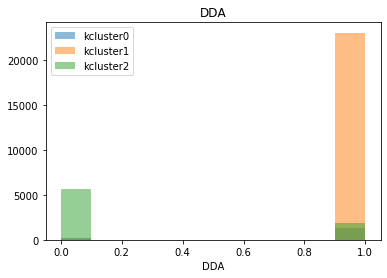

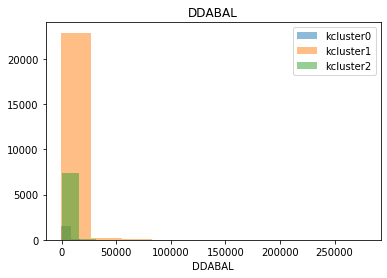

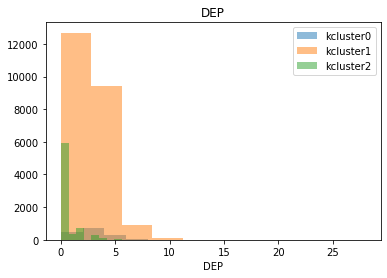

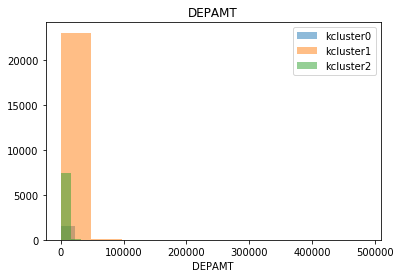

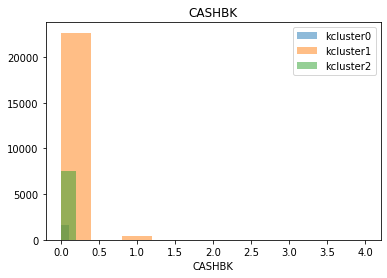

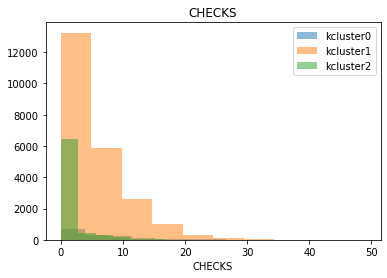

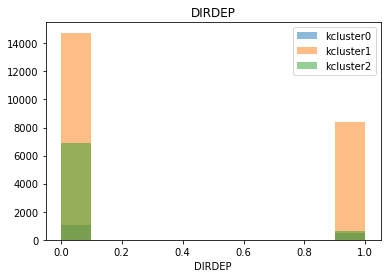

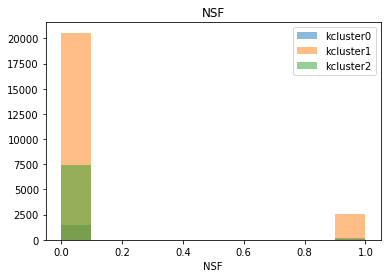

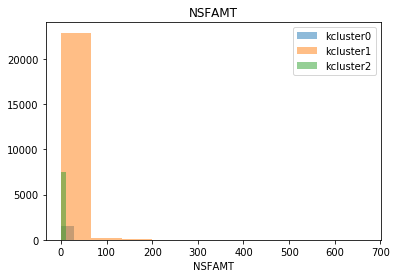

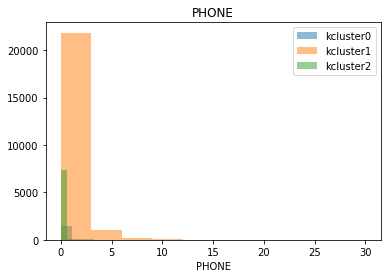

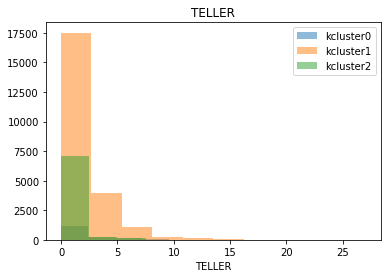

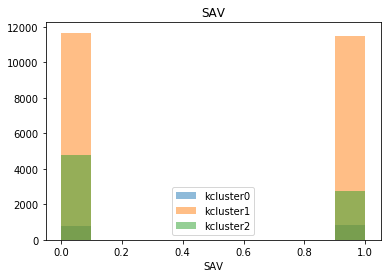

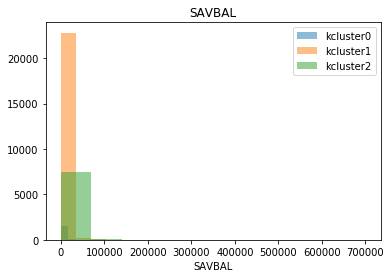

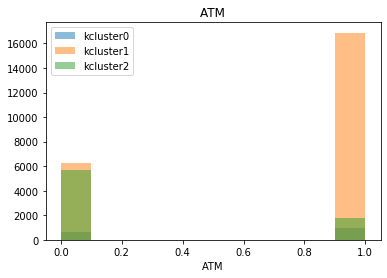

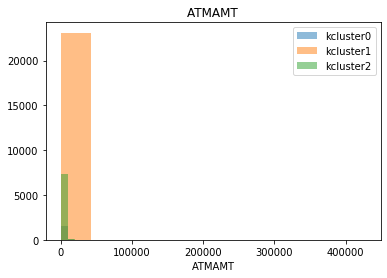

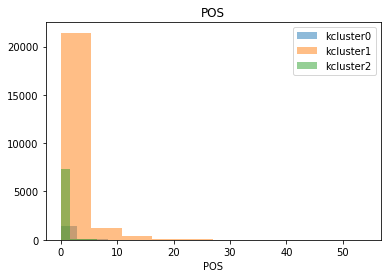

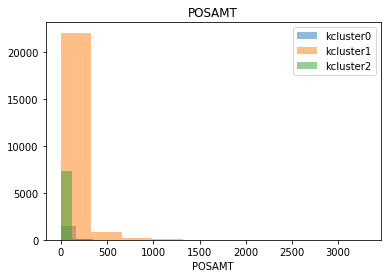

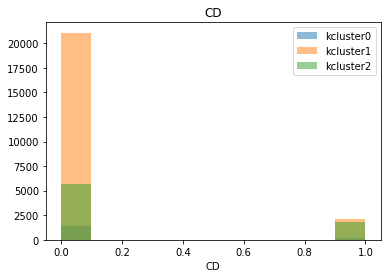

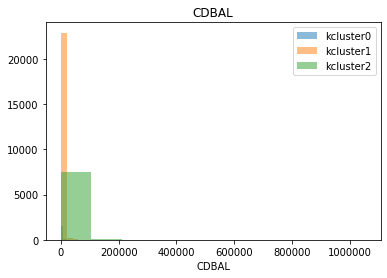

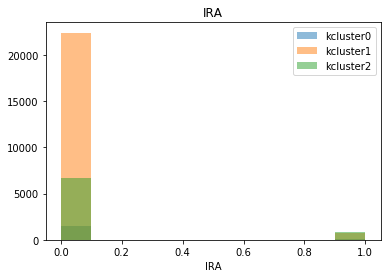

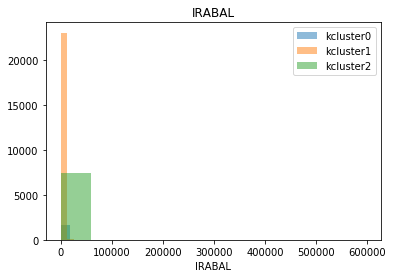

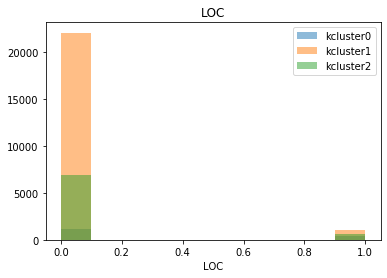

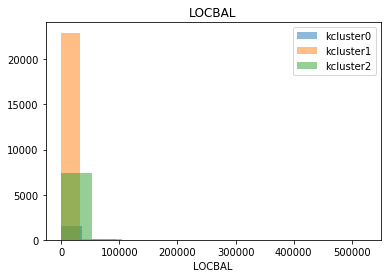

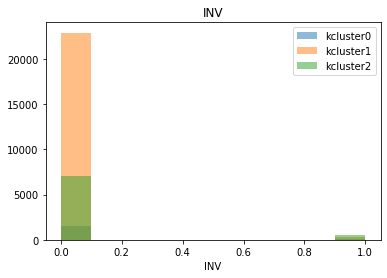

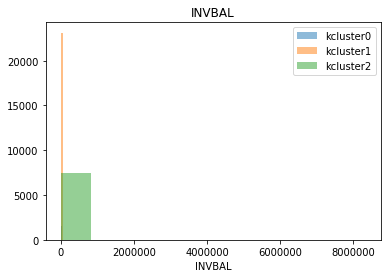

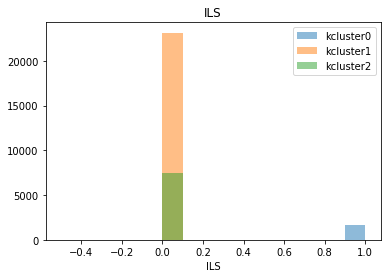

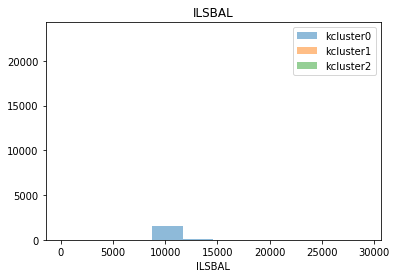

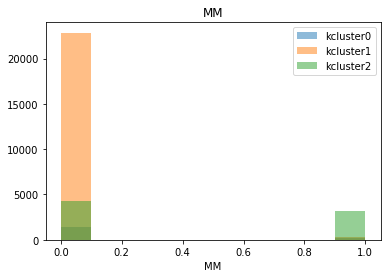

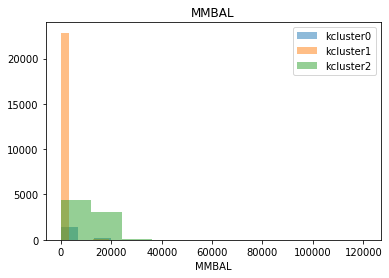

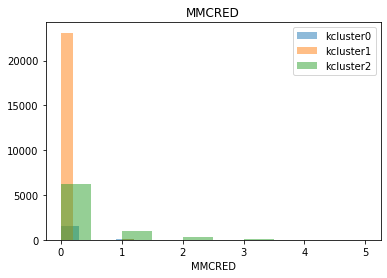

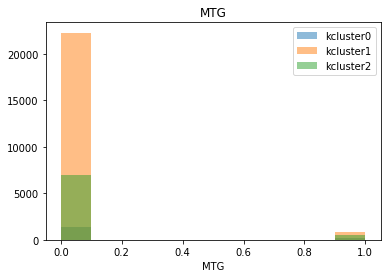

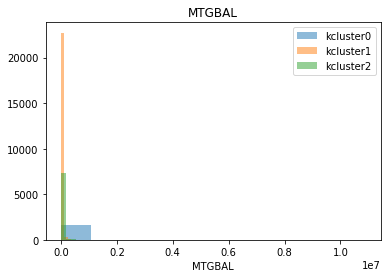

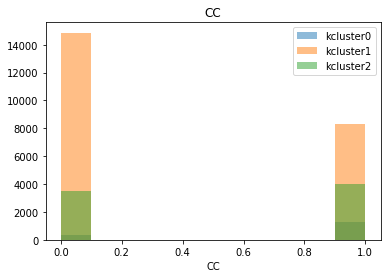

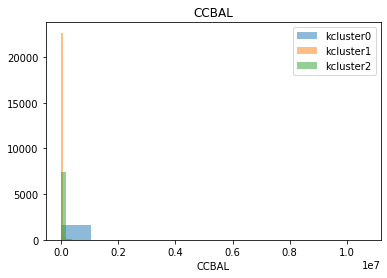

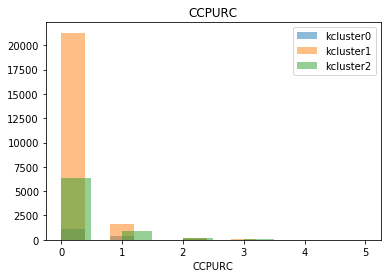

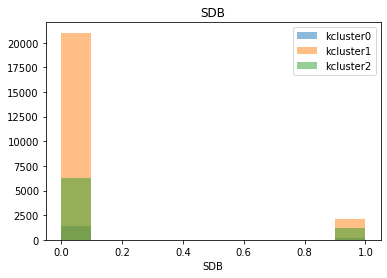

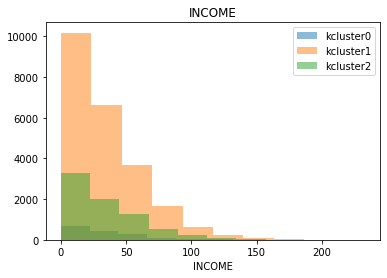

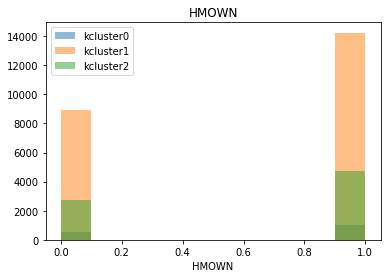

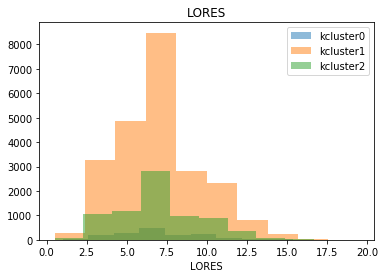

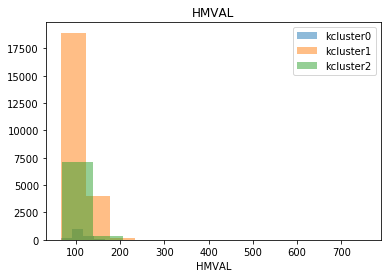

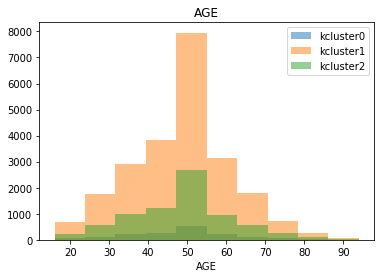

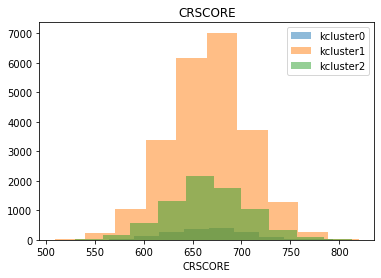

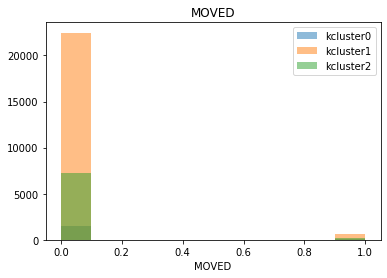

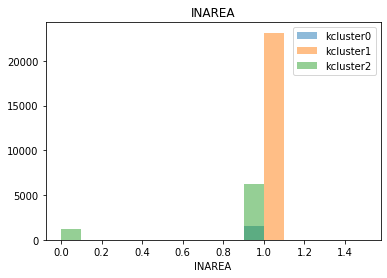

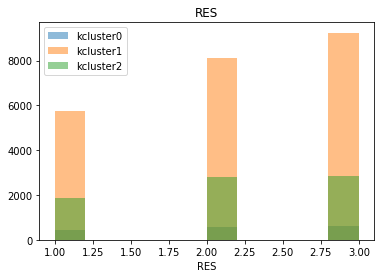

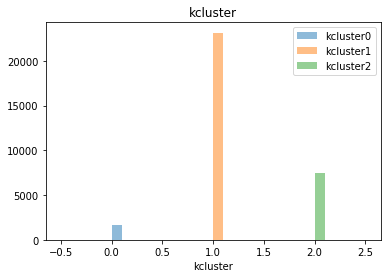

In [58]:
for column in df2.columns:
    plt.figure();
    plt.title(column)
    plt.hist(cluster0[column], alpha=0.5)
    plt.hist(cluster1[column], alpha=0.5)
    plt.hist(cluster2[column], alpha=0.5)
    plt.xlabel(column)
    plt.legend(['kcluster0','kcluster1','kcluster2'])
    plt.show();

#### H-CLUST

Now we will add hierarchical clustering and compare.

In [59]:
final_hclust = AgglomerativeClustering(n_clusters=3, linkage='ward')#plug in optimal cluster=3(based on the highest silhouette scores)

final_hclust.fit(X)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=3)

In [60]:
# Pull out the labels
hclust_labels = final_hclust.labels_
hclust_labels

array([0, 0, 0, ..., 0, 0, 1])

In [61]:
# Attach labels back to the orginal data
df3 = df2.copy()
df3['hcluster'] = hclust_labels

In [62]:
df3

ACCTAGE  DDA   DDABAL  DEP   DEPAMT  CASHBK  CHECKS  DIRDEP  NSF  \
0          0.3    1   419.27    2  1170.06       0       0       0    0   
1          0.7    1  1986.81    1   446.93       0       1       1    0   
2          4.1    0     0.00    0     0.00       0       0       0    0   
3          0.5    1  1594.84    1  1144.24       0       1       0    0   
4          6.7    1  2813.45    2  1208.94       0       2       0    0   
...        ...  ...      ...  ...      ...     ...     ...     ...  ...   
32259      0.6    1  1073.88    2   978.54       0       8       1    0   
32260      3.9    0     0.00    0     0.00       0       0       0    0   
32261     19.1    1  2139.59    3  3226.87       0       7       1    0   
32262      2.1    0     0.00    0     0.00       0       0       0    0   
32263     13.0    0     0.00    0     0.00       0       0       0    0   

       NSFAMT  ...  HMOWN  LORES  HMVAL   AGE  CRSCORE  MOVED  INAREA  RES  \
0         0.0  ...    1.0   11.0   89.0  63.0    696.0      0       1    1   
1         0.0  ...    1.0    7.0   87.0  51.0    674.0      0       1    1   
2         0.0  ...    1.0    8.5   97.0  60.0    640.0      0       1    2   
3         0.0  ...    1.0    7.5  145.0  44.0    672.0      0       1    2   
4         0.0  ...    1.0    6.0  101.0  46.0    648.0      0       1    2   
...       ...  ...    ...    ...    ...   ...      ...    ...     ...  ...   
32259     0.0  ...    0.0    5.0  129.0  37.0    634.0      0       1    1   
32260     0.0  ...    1.0    6.5  124.0  37.0    586.0      0       1    2   
32261     0.0  ...    1.0    6.5  107.0  48.0    596.0      0       1    2   
32262     0.0  ...    0.0    7.5  118.0  32.0    680.0      0       1    2   
32263     0.0  ...    0.0    3.5  109.0  39.0    600.0      0       0    3   

       kcluster  hcluster  
0             1         0  
1             1         0  
2             2         0  
3             1         0  
4             1         0  
...         ...       ...  
32259         1         0  
32260         2         0  
32261         1         0  
32262         2         0  
32263         2         1  

[32264 rows x 48 columns]

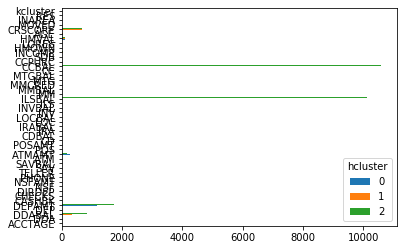

In [63]:
# Compare 3 clusters by using groupby
df3.groupby('hcluster').median().transpose().plot(kind='barh')
plt.show()

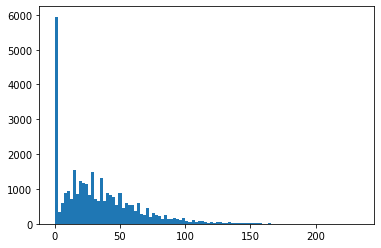

In [64]:
plt.figure()
plt.hist(df3['INCOME'], bins=100) # compare to the orginal distribution of 'INCOME'
plt.show()

In [65]:
hcluster0 = df3[df3['hcluster']==0]
hcluster1 = df3[df3['hcluster']==1]
hcluster2 = df3[df3['hcluster']==2]

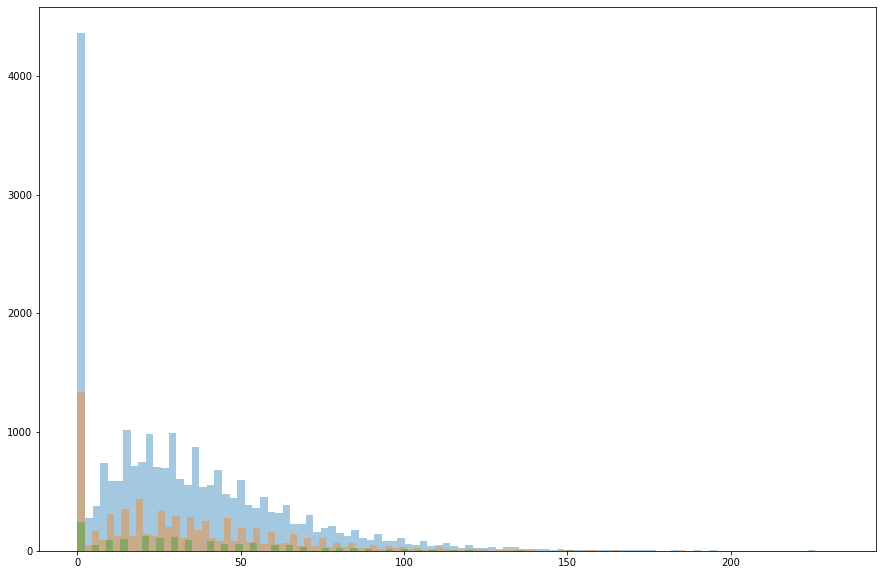

In [110]:
plt.figure(figsize=(15,10))
plt.hist(hcluster0['INCOME'], bins=100, alpha=0.4)
plt.hist(hcluster1['INCOME'], bins=100, alpha=0.4)
plt.hist(hcluster2['INCOME'], bins=100, alpha=0.4)
plt.show()

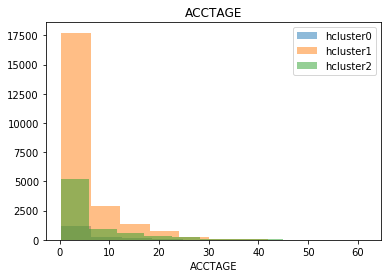

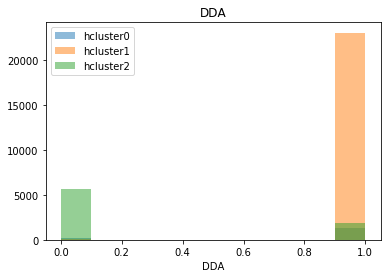

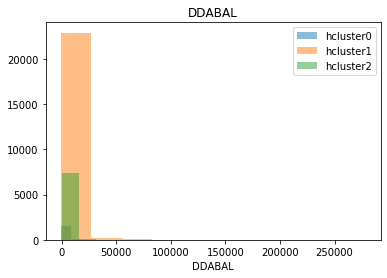

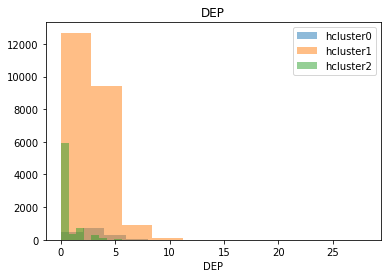

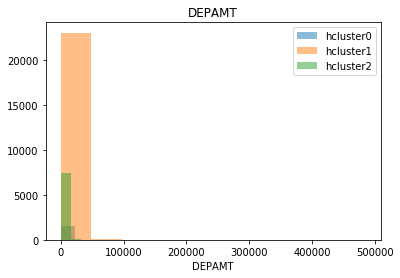

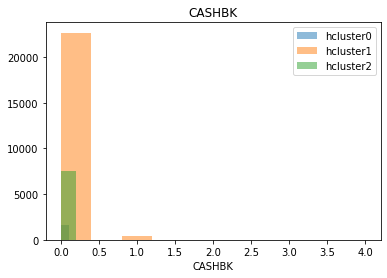

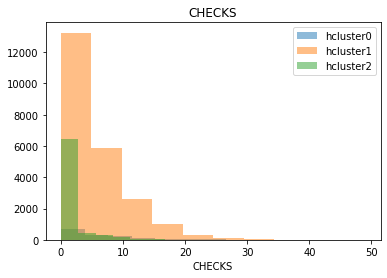

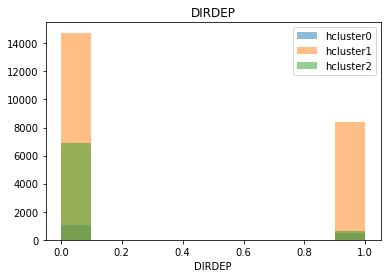

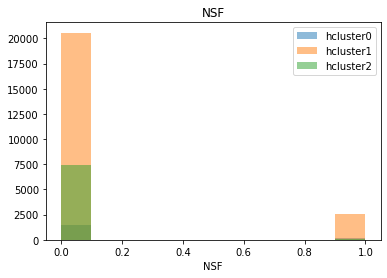

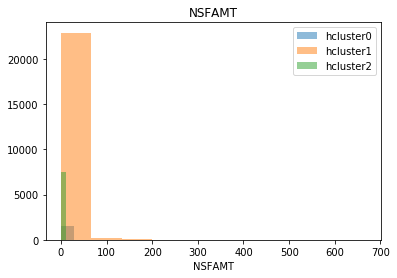

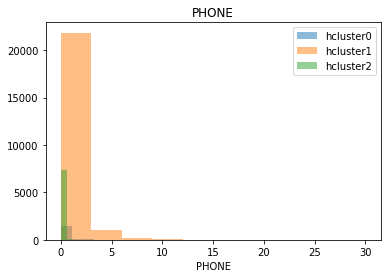

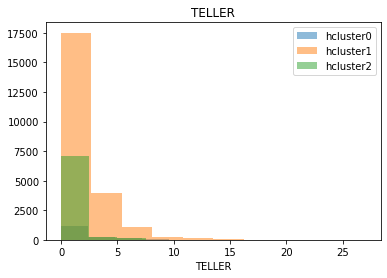

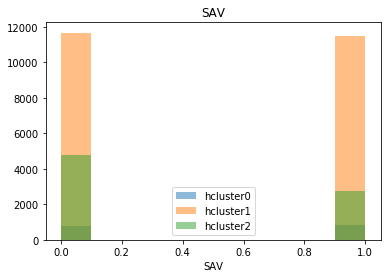

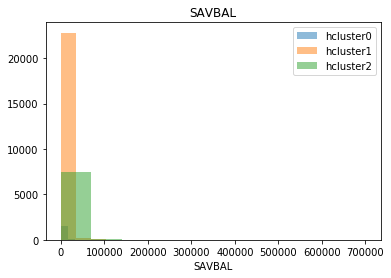

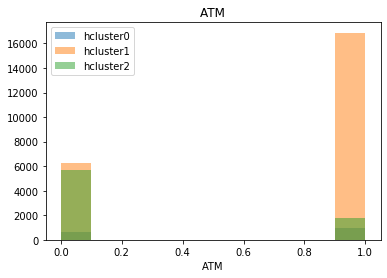

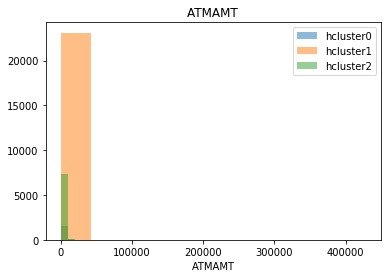

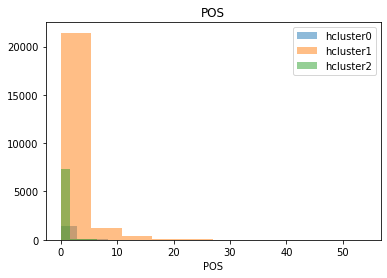

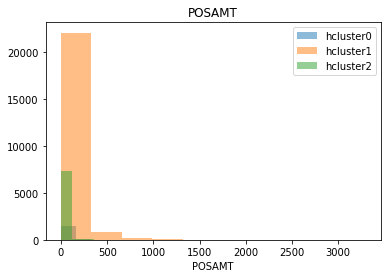

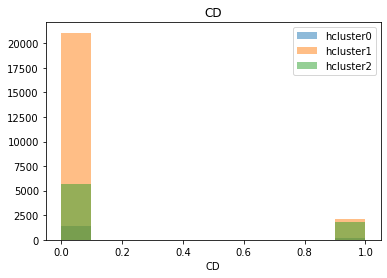

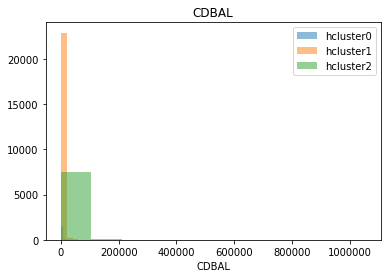

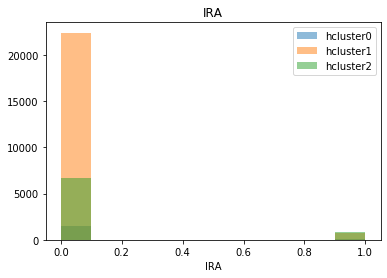

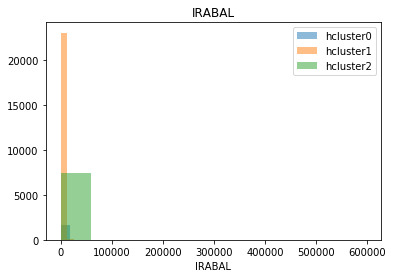

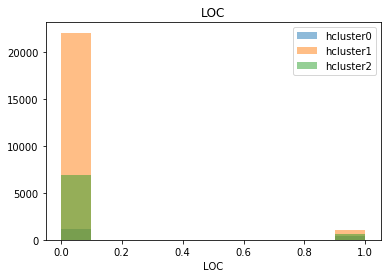

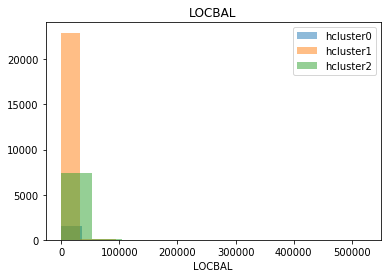

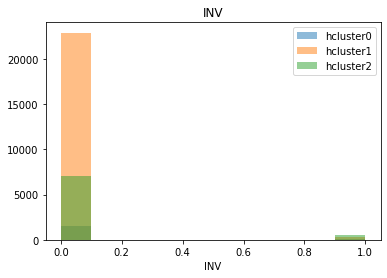

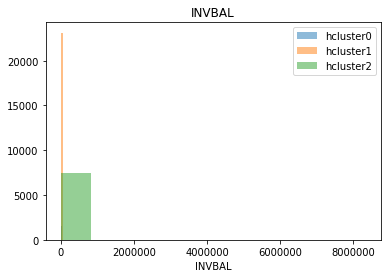

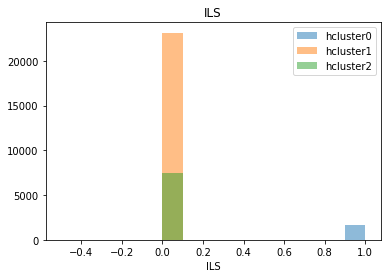

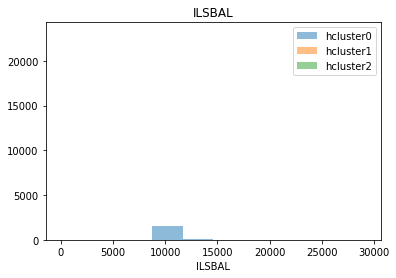

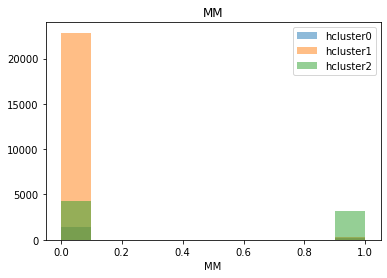

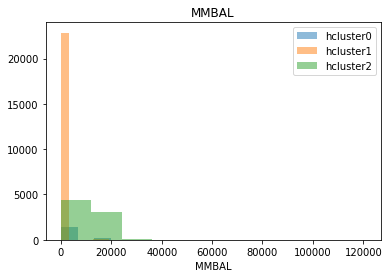

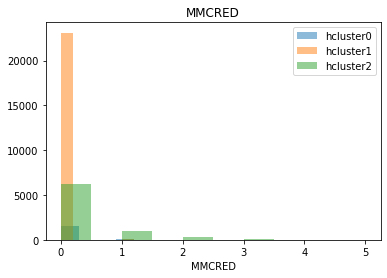

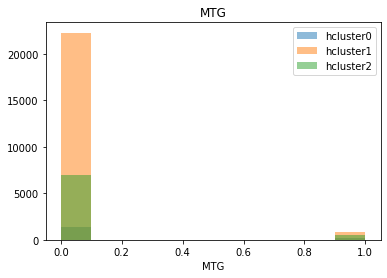

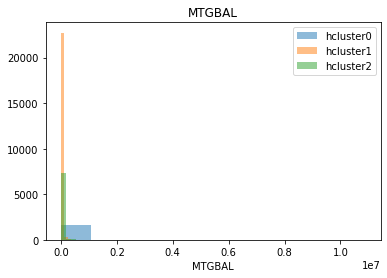

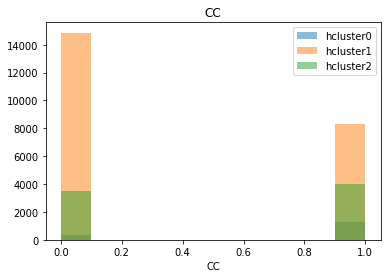

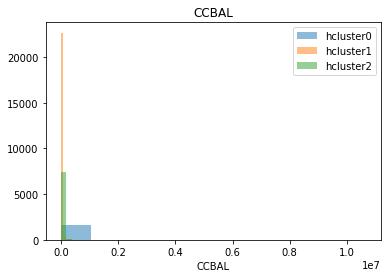

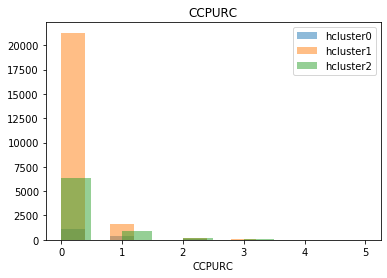

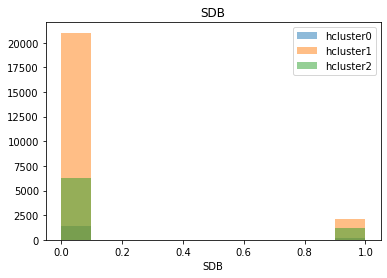

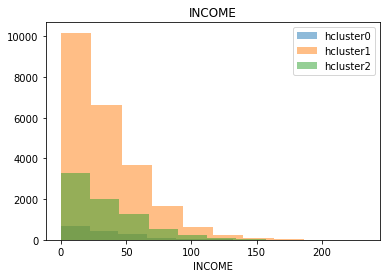

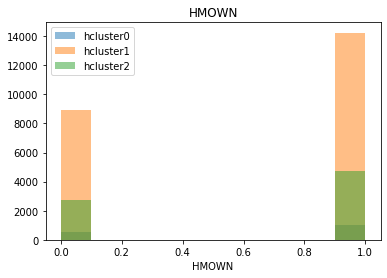

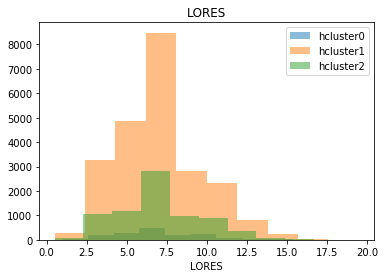

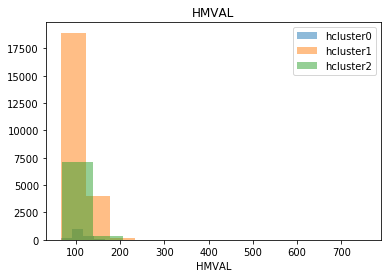

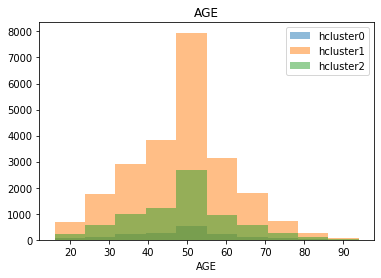

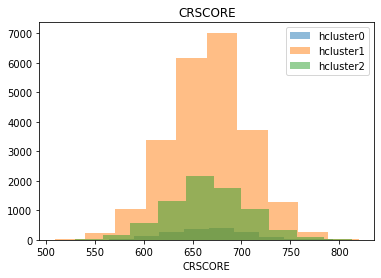

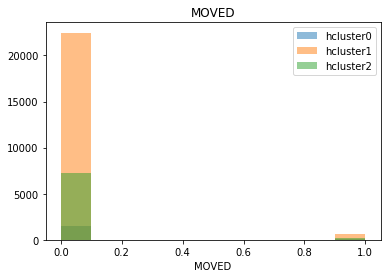

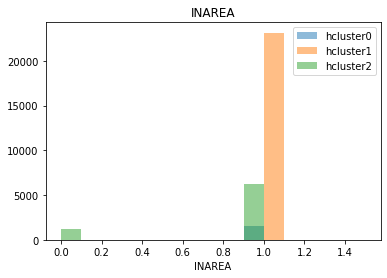

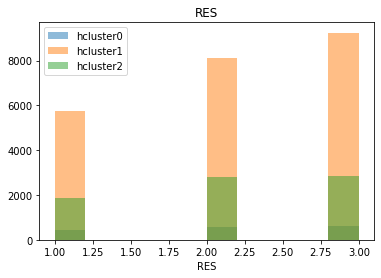

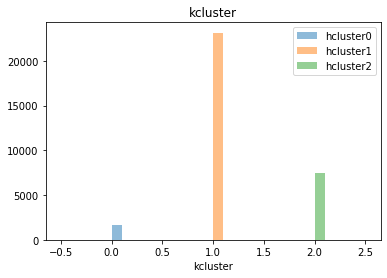

KeyError: 'hcluster'

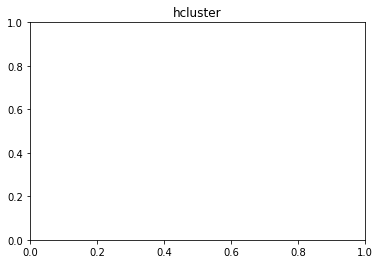

In [111]:
for column in df3.columns:
    plt.figure();
    plt.title(column)
    plt.hist(cluster0[column], alpha=0.5)
    plt.hist(cluster1[column], alpha=0.5)
    plt.hist(cluster2[column], alpha=0.5)
    plt.xlabel(column)
    plt.legend(['hcluster0','hcluster1','hcluster2'])
    plt.show();

In [67]:
# Comparing found groups
# Let's look at simple contingency table
pd.crosstab(df3['kcluster'], df3['hcluster'])

hcluster      0     1     2
kcluster                   
0            64    90  1448
1         20625  2518     0
2          2823  4692     4

In [68]:
# Comparing found groups
# Let's look at simple contingency table
pd.crosstab(df3['kcluster'], df3['hcluster'])/df3.shape[0]

hcluster         0         1         2
kcluster                              
0         0.001984  0.002789  0.044880
1         0.639257  0.078044  0.000000
2         0.087497  0.145425  0.000124

In [69]:
# Compute rand index
from sklearn.metrics import adjusted_rand_score

adjusted_rand_score(df3['kcluster'], df3['hcluster'])

0.4580997955661239

## Classification - Predict who is likely to accept campagin offers

It's time to attach the target variable INS back to df3 in order to do prediction. So let's re-read the orgianl dataset and exact the target column first.

In [70]:
df4 = pd.read_csv('data/cap_bank.csv')
df4.head()

ACCTAGE  DDA   DDABAL  DEP   DEPAMT  CASHBK  CHECKS  DIRDEP  NSF  NSFAMT  \
0      0.3    1   419.27    2  1170.06       0       0       0    0     0.0   
1      0.7    1  1986.81    1   446.93       0       1       1    0     0.0   
2      4.1    0     0.00    0     0.00       0       0       0    0     0.0   
3      0.5    1  1594.84    1  1144.24       0       1       0    0     0.0   
4      6.7    1  2813.45    2  1208.94       0       2       0    0     0.0   

   ...  HMOWN  LORES  HMVAL   AGE  CRSCORE  MOVED  INAREA  INS  BRANCH  RES  
0  ...    1.0   11.0   89.0  63.0    696.0      0       1    1     B17    R  
1  ...    1.0    7.0   87.0  51.0    674.0      0       1    0      B2    R  
2  ...    1.0    8.5   97.0  60.0    640.0      0       1    1      B3    S  
3  ...    1.0    7.5  145.0  44.0    672.0      0       1    0      B1    S  
4  ...    1.0    6.0  101.0  46.0    648.0      0       1    1      B1    S  

[5 rows x 48 columns]

In [71]:
df4['INS']

0        1
1        0
2        1
3        0
4        1
        ..
32259    0
32260    1
32261    1
32262    1
32263    0
Name: INS, Length: 32264, dtype: int64

In [72]:
# Attach target variable INS back to df3
df_final = df3.copy()
df_final['INS'] = df4['INS']

In [73]:
df_final

ACCTAGE  DDA   DDABAL  DEP   DEPAMT  CASHBK  CHECKS  DIRDEP  NSF  \
0          0.3    1   419.27    2  1170.06       0       0       0    0   
1          0.7    1  1986.81    1   446.93       0       1       1    0   
2          4.1    0     0.00    0     0.00       0       0       0    0   
3          0.5    1  1594.84    1  1144.24       0       1       0    0   
4          6.7    1  2813.45    2  1208.94       0       2       0    0   
...        ...  ...      ...  ...      ...     ...     ...     ...  ...   
32259      0.6    1  1073.88    2   978.54       0       8       1    0   
32260      3.9    0     0.00    0     0.00       0       0       0    0   
32261     19.1    1  2139.59    3  3226.87       0       7       1    0   
32262      2.1    0     0.00    0     0.00       0       0       0    0   
32263     13.0    0     0.00    0     0.00       0       0       0    0   

       NSFAMT  ...  LORES  HMVAL   AGE  CRSCORE  MOVED  INAREA  RES  kcluster  \
0         0.0  ...   11.0   89.0  63.0    696.0      0       1    1         1   
1         0.0  ...    7.0   87.0  51.0    674.0      0       1    1         1   
2         0.0  ...    8.5   97.0  60.0    640.0      0       1    2         2   
3         0.0  ...    7.5  145.0  44.0    672.0      0       1    2         1   
4         0.0  ...    6.0  101.0  46.0    648.0      0       1    2         1   
...       ...  ...    ...    ...   ...      ...    ...     ...  ...       ...   
32259     0.0  ...    5.0  129.0  37.0    634.0      0       1    1         1   
32260     0.0  ...    6.5  124.0  37.0    586.0      0       1    2         2   
32261     0.0  ...    6.5  107.0  48.0    596.0      0       1    2         1   
32262     0.0  ...    7.5  118.0  32.0    680.0      0       1    2         2   
32263     0.0  ...    3.5  109.0  39.0    600.0      0       0    3         2   

       hcluster  INS  
0             0    1  
1             0    0  
2             0    1  
3             0    0  
4             0    1  
...         ...  ...  
32259         0    0  
32260         0    1  
32261         0    1  
32262         0    1  
32263         1    0  

[32264 rows x 49 columns]

In [74]:
df_final.columns

Index(['ACCTAGE', 'DDA', 'DDABAL', 'DEP', 'DEPAMT', 'CASHBK', 'CHECKS',
       'DIRDEP', 'NSF', 'NSFAMT', 'PHONE', 'TELLER', 'SAV', 'SAVBAL', 'ATM',
       'ATMAMT', 'POS', 'POSAMT', 'CD', 'CDBAL', 'IRA', 'IRABAL', 'LOC',
       'LOCBAL', 'INV', 'INVBAL', 'ILS', 'ILSBAL', 'MM', 'MMBAL', 'MMCRED',
       'MTG', 'MTGBAL', 'CC', 'CCBAL', 'CCPURC', 'SDB', 'INCOME', 'HMOWN',
       'LORES', 'HMVAL', 'AGE', 'CRSCORE', 'MOVED', 'INAREA', 'RES',
       'kcluster', 'hcluster', 'INS'],
      dtype='object')

### Modeling

In [75]:
# Check missing values again
df_final.isna().sum(axis=0) 

ACCTAGE     0
DDA         0
DDABAL      0
DEP         0
DEPAMT      0
CASHBK      0
CHECKS      0
DIRDEP      0
NSF         0
NSFAMT      0
PHONE       0
TELLER      0
SAV         0
SAVBAL      0
ATM         0
ATMAMT      0
POS         0
POSAMT      0
CD          0
CDBAL       0
IRA         0
IRABAL      0
LOC         0
LOCBAL      0
INV         0
INVBAL      0
ILS         0
ILSBAL      0
MM          0
MMBAL       0
MMCRED      0
MTG         0
MTGBAL      0
CC          0
CCBAL       0
CCPURC      0
SDB         0
INCOME      0
HMOWN       0
LORES       0
HMVAL       0
AGE         0
CRSCORE     0
MOVED       0
INAREA      0
RES         0
kcluster    0
hcluster    0
INS         0
dtype: int64

In [76]:
# Set up X (independent variables) and y (target variable)
X = df_final.drop('INS', axis=1)
y = df_final['INS']

# Print shapes
print('Shape of X:', X.shape)
print('Shape of y:', y.shape)

Shape of X: (32264, 48)
Shape of y: (32264,)


In [77]:
# Imbalanced classes
y.value_counts()/len(df)

0    0.653639
1    0.346361
Name: INS, dtype: float64

In [78]:
# Downsampling
#from sklearn.utils import resample
#df_1 = df_final[df_final['INS']==df_final['INS'].value_counts().index[0]]
#df_2 = df_final[df_final['INS']!=df_final['INS'].value_counts().index[0]]

#df_down = resample(df_1, replace=True, n_samples=df_final['INS'].value_counts().values[1], random_state=42)

#df_real_final = pd.concat([df_down, df_2])

#df_real_final['INS'].value_counts()

# Set up X (independent variables) and y (target variable)

#X = df_real_final.drop('INS', axis=1)
#y = df_real_final['INS']

# Print shapes
#print('Shape of X:', X.shape)
#print('Shape of y:', y.shape)

# Split the data into remainder and test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

# Print info on how the data has been split
#print(f'The train set has {len(X_train)} data points.')
#print(f'The test set has {len(X_test)} data points.')

Downsampling gives me a lower accuracy compared to the previous accuracy, so I will try upsampling.

In [79]:
# Upsampling
from sklearn.utils import resample

# Reload the data
X = df_final.drop('INS', axis=1)
y = df_final['INS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

# Upsample
print('Number of class 1 examples before:', X_train[y_train == 1].shape[0])

X_upsampled, y_upsampled = resample(X_train[y_train == 1], 
                                    y_train[y_train == 1], 
                                    replace=True, 
                                    n_samples=X_train[y_train == 0].shape[0], 
                                    random_state=123)

print('Number of class 1 examples after:', X_upsampled.shape[0])

# Combine upsample with original data
X_train_bal = np.vstack((X_train[y_train == 0], X_upsampled))
y_train_bal = np.hstack((y_train[y_train == 0], y_upsampled))

Number of class 1 examples before: 9012
Number of class 1 examples after: 16799


**Logistic Regression**

In [80]:
# Using pipeline and grid search to do Scale, Dimension Reduction and Hyperparameterization
# Set up a directory to cache the pipeline results
cachedir = mkdtemp()

In [81]:
# Set up a pipeline for Logistic Regression 
# The steps here act as placeholders and will be changed when we pass the pipeline into the grid search later
my_pipeline = Pipeline([('scaler', StandardScaler()), ('dim_reducer', PCA()), ('model', LogisticRegression())], memory=cachedir)

In [82]:
# Try a range of C values 
c_values = [.00001, .0001, .001, .1, 1, 10, 100, 1000, 10000]

# Parameter grid
logreg_param_grid = [
    
    # l1 without PCA
    {'scaler': [None, StandardScaler(), MinMaxScaler(), RobustScaler()],
     'dim_reducer': [None],
     'model': [LogisticRegression(penalty='l1', random_state=1)],
     'model__C': c_values},
    
    # l1 with PCA
    {'scaler': [None, StandardScaler(), MinMaxScaler(), RobustScaler()],
     'dim_reducer': [PCA()],
     'dim_reducer__n_components': [0.95, 0.9, 0.85, 0.8],
     'model': [LogisticRegression(penalty='l1', solver='liblinear', random_state=1, n_jobs=-1)],
     'model__C': c_values},
    
    # l2 (default) without PCA
    {'scaler': [None, StandardScaler(), MinMaxScaler(), RobustScaler()],
     'dim_reducer': [None],
     'model': [LogisticRegression(random_state=1, n_jobs=-1)],
     'model__C': c_values},
    
    # l2 (default) with PCA
    {'scaler': [None, StandardScaler(), MinMaxScaler(), RobustScaler()],
     'dim_reducer': [PCA()],
     'dim_reducer__n_components': [0.95, 0.9, 0.85, 0.8],
     'model': [LogisticRegression(random_state=1,n_jobs=-1)],
     'model__C': c_values}
]

In [83]:
# Instantiate the log reg grid search
logreg_gs = GridSearchCV(my_pipeline, param_grid=logreg_param_grid, cv=5, verbose=5)

# Fit the log reg grid search
fitted_logreg_gs = logreg_gs.fit(X_train, y_train)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), model__C=1e-05, scaler=None 
[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), model__C=1e-05, scaler=None, score=nan, total=   0.0s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), model__C=1e-05, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.3s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), model__C=1e-05, scaler=StandardScaler(copy=True, with_mean=True, with_std=True) 
[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), model__C=1e-05, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=nan, total=   0.3s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), model__C=1e-05, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True) 
[CV]  di

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), model__C=0.0001, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.1s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), model__C=0.0001, scaler=StandardScaler(copy=True, with_mean=True, with_std=True) 
[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=Tru

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), model__C=0.0001, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=nan, total=   0.1s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), model__C=0.001, scaler=None 
[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
 

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), model__C=0.001, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.1s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), model__C=0.001, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)) 
[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   in

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), model__C=0.1, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.1s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), model__C=0.1, scaler=StandardScaler(copy=True, with_mean=True, with_std=True) 
[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
   

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), model__C=0.1, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=nan, total=   0.1s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), model__C=0.1, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True) 
[CV]  dim_re

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), model__C=1, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.1s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), model__C=1, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)) 
[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), model__C=10, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.1s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), model__C=10, scaler=StandardScaler(copy=True, with_mean=True, with_std=True) 
[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), model__C=10, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=nan, total=   0.1s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), model__C=10, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True) 
[CV]  dim_redu

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), model__C=100, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.1s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), model__C=100, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)) 
[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   interc

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), model__C=1000, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.1s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), model__C=1000, scaler=StandardScaler(copy=True, with_mean=True, with_std=True) 
[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
 

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), model__C=1000, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=nan, total=   0.1s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), model__C=1000, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True) 
[CV]  dim_

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), model__C=10000, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.1s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), model__C=10000, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)) 
[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=1e-05, scaler=None, score=0.651, total=   0.5s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, ver

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=1e-05, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=0.651, total=   0.3s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
  

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=1e-05, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=0.654, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='a

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=0.0001, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=0.651, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
 

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=0.0001, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=0.651, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
            

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=0.001, scaler=None, score=0.684, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, ver

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=0.001, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=0.651, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
             

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=0.001, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=0.653, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='a

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=0.1, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=0.719, total=   0.3s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=0.1, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=0.652, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='aut

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=1, scaler=None, score=0.674, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=1, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=0.694, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                 

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=1, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=0.652, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto'

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=10, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=0.719, total=   0.3s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
     

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=10, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=0.652, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=100, scaler=None, score=0.674, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbo

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=100, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=0.694, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
               

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=100, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=0.652, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='aut

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=1000, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=0.719, total=   0.3s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
   

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=1000, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=0.652, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='au

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=10000, scaler=None, score=0.674, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, ver

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=10000, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=0.694, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
             

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=10000, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=0.652, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='au

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=1e-05, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=0.651, total=   0.3s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=1e-05, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=0.653, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='aut

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=0.0001, scaler=None, score=0.639, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verb

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=0.0001, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=0.651, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
              

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=0.0001, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=0.654, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='au

[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=0.001, scaler=StandardScaler(copy=True, with_mean=True, with_std=True) 
[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='libl

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=0.001, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=0.652, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='aut

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=0.1, scaler=None, score=0.651, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=0.1, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=0.693, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                 

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=0.1, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=0.652, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto'

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=1, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=0.719, total=   0.3s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
        

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=1, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=0.652, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', 

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=10, scaler=None, score=0.651, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=10, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=0.695, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                  

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=10, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=0.652, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto',

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=100, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=0.719, total=   0.3s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
      

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=100, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=0.652, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto'

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=1000, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=0.695, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=1000, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=0.651, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=10000, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=0.714, total=   0.3s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=10000, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=0.652, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='aut

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=1e-05, scaler=None, score=0.638, total=   0.3s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, ver

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=1e-05, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=0.651, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
             

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=1e-05, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=0.637, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='a

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=0.0001, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=0.651, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
 

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=0.0001, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=0.651, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
            

                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=0.001, scaler=None 
[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=0.001, scaler=None, score=0.652, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=0.001, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=0.651, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
             

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=0.001, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=0.651, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='a

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=0.1, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=0.713, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=0.1, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=0.652, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='aut

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=1, scaler=None, score=0.652, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=1, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=0.691, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                 

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=1, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=0.652, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto'

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=10, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=0.716, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
     

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=10, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=0.652, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=100, scaler=None, score=0.652, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbo

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=100, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=0.692, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
               

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=100, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=0.652, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='aut

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=1000, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=0.716, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
   

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=1000, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=0.652, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='au

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=10000, scaler=None, score=0.652, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, ver

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=10000, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=0.692, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
             

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=10000, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=0.652, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='au

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=1e-05, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=0.651, total=   0.3s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=1e-05, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=0.653, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='aut

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=0.0001, scaler=None, score=0.639, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verb

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=0.0001, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=0.651, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
              

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=0.0001, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=0.654, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='au

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=0.001, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=0.700, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=0.001, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=0.652, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='aut

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=0.1, scaler=None, score=0.652, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=0.1, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=0.693, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                 

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=0.1, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=0.652, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto'

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=1, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=0.715, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
        

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=1, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=0.652, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', 

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=10, scaler=None, score=0.652, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=

                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=10, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)) 
[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=10, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=0.693, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=10, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=0.651, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto',

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=100, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=0.711, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
      

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=100, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=0.700, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                 

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=1000, scaler=None, score=0.651, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbos

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=1000, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=0.699, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=10000, scaler=None, score=0.652, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbo

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=10000, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=0.730, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=10000, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=0.651, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='aut

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1e-05, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=0.651, total=   0.3s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1e-05, scaler=StandardScaler(copy=True, with_mean=True, with_std=True) 
[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1,

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1e-05, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=0.689, total=   2.2s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1e-05, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True) 
[CV]  dim_reducer=None, model=LogisticRegression

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.0001, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=0.687, total=   0.4s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.0001, scaler=StandardScaler(copy=True, with_mean=True, with_std=True) 
[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.0001, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=0.662, total=   2.2s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.0001, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True) 
[CV]  dim_reducer=None, model=LogisticRegressi

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.001, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=0.715, total=   0.4s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.001, scaler=StandardScaler(copy=True, with_mean=True, with_std=True) 
[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1,

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.001, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=0.675, total=   2.4s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.001, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True) 
[CV]  dim_reducer=None, model=LogisticRegression

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.1, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=0.721, total=   1.1s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.1, scaler=StandardScaler(copy=True, with_mean=True, with_std=True) 
[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.1, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=0.659, total=   2.1s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.1, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True) 
[CV]  dim_reducer=None, model=LogisticRegression(C=1

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=0.721, total=   1.0s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1, scaler=StandardScaler(copy=True, with_mean=True, with_std=True) 
[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_rati

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=0.664, total=   2.0s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True) 
[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, 

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=0.721, total=   1.0s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10, scaler=StandardScaler(copy=True, with_mean=True, with_std=True) 
[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ra

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=0.659, total=   2.3s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True) 
[CV]  dim_reducer=None, model=LogisticRegression(C=1.0

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=100, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=0.721, total=   1.1s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=100, scaler=StandardScaler(copy=True, with_mean=True, with_std=True) 
[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=100, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=0.659, total=   2.2s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=100, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True) 
[CV]  dim_reducer=None, model=LogisticRegression(C=1

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1000, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=0.721, total=   1.1s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1000, scaler=StandardScaler(copy=True, with_mean=True, with_std=True) 
[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1000, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=0.660, total=   2.1s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1000, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True) 
[CV]  dim_reducer=None, model=LogisticRegression(C

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10000, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=0.721, total=   1.1s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10000, scaler=StandardScaler(copy=True, with_mean=True, with_std=True) 
[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1,

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10000, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=0.659, total=   2.2s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10000, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True) 
[CV]  dim_reducer=None, model=LogisticRegression

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1e-05, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=0.651, total=   0.3s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
      

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1e-05, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=0.651, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                 

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.0001, scaler=None, score=0.652, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0,

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.0001, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=0.691, total=   0.3s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
     

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.0001, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=0.679, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.001, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=0.708, total=   0.3s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
      

                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.001, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)) 
[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.001, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=0.677, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.1, scaler=None, score=0.652, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, wa

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.1, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=0.727, total=   0.4s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
        

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.1, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=0.654, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', 

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1, scaler=None, score=0.638, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=0.703, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   so

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10, scaler=None, score=0.652, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, war

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=0.727, total=   0.4s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
         

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=0.654, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=100, scaler=None, score=0.638, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, wa

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=100, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=0.703, total=   0.3s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1000, scaler=None, score=0.652, total=   0.3s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, w

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1000, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=0.727, total=   0.5s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
       

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1000, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=0.654, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto',

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10000, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=0.717, total=   0.5s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
      

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10000, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=0.698, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                 

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1e-05, scaler=None, score=0.652, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, wa

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1e-05, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=0.651, total=   0.3s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
        

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1e-05, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=0.654, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', 

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.0001, scaler=None, score=0.648, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, w

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.0001, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=0.651, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                  

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.001, scaler=None, score=0.655, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, wa

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.001, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=0.721, total=   0.4s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
        

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.001, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=0.633, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', 

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.1, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=0.714, total=   0.4s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
          

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.1, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=0.701, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   so

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1, scaler=None, score=0.639, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_s

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=0.694, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solv

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=0.633, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jo

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=0.714, total=   0.4s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
           

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=0.700, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   sol

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=100, scaler=None, score=0.639, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=100, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=0.694, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   so

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=100, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=0.633, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1000, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=0.714, total=   0.4s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
         

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1000, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=0.700, total=   0.3s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   s

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10000, scaler=None, score=0.639, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, wa

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10000, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=0.694, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10000, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=0.633, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', 

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1e-05, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=0.651, total=   0.3s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
      

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1e-05, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=0.651, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                 

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.0001, scaler=None, score=0.639, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0,

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.0001, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=0.651, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.0001, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=0.633, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.001, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=0.708, total=   0.3s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
      

             with_scaling=True) 
[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.001, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=0.653, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.1, scaler=None, score=0.639, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, wa

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.1, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=0.694, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.1, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=0.633, total=   0.3s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', 

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=0.712, total=   0.3s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
          

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=0.699, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   so

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10, scaler=None, score=0.639, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, war

                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)) 
[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=0.692, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   interc

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=0.633, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=100, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=0.712, total=   0.3s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
        

                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=100, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)) 
[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=100, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=0.699, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   inte

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1000, scaler=None, score=0.639, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, w

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1000, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=0.694, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                  

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1000, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=0.633, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto',

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10000, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=0.712, total=   0.4s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
      

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10000, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=0.699, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                 

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1e-05, scaler=None, score=0.639, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, wa

                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1e-05, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)) 
[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1e-05, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=0.651, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   in

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1e-05, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=0.633, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', 

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.0001, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=0.684, total=   0.3s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
       

             with_scaling=True) 
[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.0001, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=0.653, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
     

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.001, scaler=None, score=0.639, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, wa

[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.001, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)) 
[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001,

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.001, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=0.633, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', 

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.1, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=0.711, total=   0.3s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
          

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.1, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=0.653, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1, scaler=None, score=0.628, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_s

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=0.692, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solv

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=0.654, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jo

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=0.715, total=   0.3s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
           

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=0.654, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_j

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=100, scaler=None, score=0.648, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=100, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=0.699, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   so

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1000, scaler=None, score=0.655, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, war

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1000, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=0.723, total=   0.3s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
         

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1000, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=0.633, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10000, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=0.711, total=   0.3s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
        

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10000, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=0.653, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', 

[Parallel(n_jobs=1)]: Done 1800 out of 1800 | elapsed:  9.9min finished


In [84]:
# Print the accuracies
print(f"The best logistic regression's accuracy on the train set: {fitted_logreg_gs.score(X_train, y_train)}")
print(f"The best logistic regression's accuracy on the test set: {fitted_logreg_gs.score(X_test, y_test)}")

The best logistic regression's accuracy on the train set: 0.723218782689551
The best logistic regression's accuracy on the test set: 0.734852006818534


Accuracy on the test set does increase from 0.72 to 0.73 after clustering and upsampled the data compared to the previous data without clustering and upsampling.

In [85]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix

y_pred = fitted_logreg_gs.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
prob_df = pd.DataFrame(cm, columns=['Predicted 0', 'Predicted 1'])
prob_df.index=['Actual 0', 'Actual 1'] 
prob_df


Predicted 0  Predicted 1
Actual 0         3865          425
Actual 1         1286          877

- Correctly predicted class 0: 3864
- Incorrectly predicted class 0: 1295
- Incorrectly predicted class 1: 426
- Correctly predicted class 1: 868

In [86]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.75      0.90      0.82      4290
           1       0.67      0.41      0.51      2163

    accuracy                           0.73      6453
   macro avg       0.71      0.65      0.66      6453
weighted avg       0.72      0.73      0.71      6453



**Classification report for a threshold of default 0.5:**

- Precision Score for Test data: 0.67
- Recall Score for Test data: 0.40
- F1 Score for Test data: 0.50

**Interpretion:**
- Precision: 67% of data points that our model correctly classified as class 1 among the number of data points that we either correctly or incorrectly classified as class 1.
- Recall : 40% of data points that our model correctly classified as class 1 among all the data points that belong to the class 1. That is low! 
- F1 score : 0.5 is a balanced number between Precision and Recall.

   
 


In [87]:
# Get probabilities using the test set
probabilities = fitted_logreg_gs.predict_proba(X_test)

# Check
probabilities

array([[0.55457636, 0.44542364],
       [0.69839198, 0.30160802],
       [0.64251149, 0.35748851],
       ...,
       [0.71616829, 0.28383171],
       [0.84584033, 0.15415967],
       [0.79792482, 0.20207518]])

In [88]:
# Put it into a dataframe
prob_df = pd.DataFrame(probabilities, columns=['probability of being class 0', 'probability of being class 1'])
prob_df

probability of being class 0  probability of being class 1
0                         0.554576                      0.445424
1                         0.698392                      0.301608
2                         0.642511                      0.357489
3                         0.677029                      0.322971
4                         0.008182                      0.991818
...                            ...                           ...
6448                      0.145917                      0.854083
6449                      0.899662                      0.100338
6450                      0.716168                      0.283832
6451                      0.845840                      0.154160
6452                      0.797925                      0.202075

[6453 rows x 2 columns]

In [89]:
# Look at just the column for class 1
y_proba = probabilities[:, 1]

# Can put in a dataframe
pd.DataFrame(y_proba, columns=['probability of being class 1'])

probability of being class 1
0                         0.445424
1                         0.301608
2                         0.357489
3                         0.322971
4                         0.991818
...                            ...
6448                      0.854083
6449                      0.100338
6450                      0.283832
6451                      0.154160
6452                      0.202075

[6453 rows x 1 columns]

So let's lower the threshold to increase recall and capture more members of the positive class.

In [90]:
import numpy as np

# If the probability that a data point belongs to the positive class is greater than 0.2, it gets classified as 1; otherwise, it gets classified as 0
y_pred_20 = np.where(y_proba > 0.2, 1, 0)

print('Classification report for a threshold of 0.2:\n')
print(classification_report(y_test, y_pred_20))

Classification report for a threshold of 0.2:

              precision    recall  f1-score   support

           0       0.89      0.37      0.53      4290
           1       0.42      0.91      0.58      2163

    accuracy                           0.55      6453
   macro avg       0.66      0.64      0.55      6453
weighted avg       0.73      0.55      0.54      6453



Recall increases from 0.40 to 0.91 after I lower the threshold to 0.2. Our model correctly classified more False Positive data points as class 1.

In [91]:
#  accuracy score doesn't change... 
# print(f"The best logistic regression's accuracy on the train set: {fitted_logreg_gs.score(X_train, y_train)}")
# print(f"The best logistic regression's accuracy on the test set: {fitted_logreg_gs.score(X_test, y_test)}")

In [92]:
# Save to file in the current working directory
#logreg_ml = "logreg_ml.pkl"
#joblib.dump(fitted_logreg_gs, logreg_ml)


joblib.dump(fitted_logreg_gs, 'my_logistic_model.pkl') 

['my_logistic_model.pkl']

In [93]:
# Reload the model in a new variable
my_new_logistic_model = joblib.load('my_logistic_model.pkl') 

In [94]:
log_reg_best_estimator = fitted_logreg_gs.best_estimator_
log_reg_best_estimator

Pipeline(memory='/var/folders/4m/bqgz9wb15jj793lyl_y609m80000gn/T/tmp4atoy7iw',
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('dim_reducer', None),
                ('model',
                 LogisticRegression(C=10, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=-1, penalty='l2',
                                    random_state=1, solver='lbfgs', tol=0.0001,
                                    verbose=0, warm_start=False))],
         verbose=False)

In [95]:
coefficient = log_reg_best_estimator[2].coef_
coefficient

array([[-0.10720872, -0.1592296 ,  0.41419669, -0.11236326,  0.02218431,
        -0.04759602, -0.12301753,  0.00376558,  0.00975139,  0.01293295,
        -0.09818965,  0.17085917,  0.25251526,  0.63052822, -0.08069874,
         0.26261779, -0.11039413,  0.12876756,  0.29208059,  0.01235893,
         0.10704193,  0.00789594, -0.04232112, -0.05491901,  0.07952485,
         0.03452483, -0.02646058,  0.02591972,  0.43669285, -0.23176847,
        -0.02483425, -0.03819081, -0.21682105,  0.22081827,  0.196028  ,
         0.01372604,  0.02455501, -0.02143511, -0.03474283,  0.04805033,
         0.06836487, -0.00655872, -0.00650633, -0.01179781, -0.00063869,
         0.01087503,  0.11645406, -0.02011055]])

**Random Forest**

In [97]:
# Set up a directory to cache the pipeline results
cachedir = mkdtemp()

In [98]:
# Set up a pipeline and put placeholders
my_pipeline = Pipeline([('model', RandomForestClassifier())], memory=cachedir)

                        
# n_estimators
n_estimators = np.arange(1, 102, 10)

# Set up a pipeline and put placeholders
my_pipeline = Pipeline([('model', RandomForestClassifier())], memory=cachedir)

                    

# Parameter grid
rf_param_grid = [{'model': [RandomForestClassifier()],
                  'model__n_estimators': np.arange(1, 102, 10),
                  'model__max_depth' : [1]}]




# Make my GridSearchCV
random_forest_gs = GridSearchCV(estimator = my_pipeline, param_grid = rf_param_grid, cv=5)


# Fit the log reg grid search
fitted_randomforest_gs = random_forest_gs.fit(X_train, y_train)

In [99]:
fitted_randomforest_gs.best_estimator_

Pipeline(memory='/var/folders/4m/bqgz9wb15jj793lyl_y609m80000gn/T/tmp86noxy8l',
         steps=[('model',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=1, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=1, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False))],
         verbose=False)

In [100]:
# Print the accuracies
print(f"The best Random Forest's accuracy on the train set: {fitted_randomforest_gs.score(X_train, y_train)}")
print(f"The best Random Forest's accuracy on the test set: {fitted_randomforest_gs.score(X_test, y_test)}")

The best Random Forest's accuracy on the train set: 0.6768819495563907
The best Random Forest's accuracy on the test set: 0.6871222687122269


#### KNN

In [101]:
# Set up a directory to cache the pipeline results
cachedir = mkdtemp()

# Set up a pipeline and put placeholders
my_pipeline = Pipeline([('scaler', StandardScaler()), ('dim_reducer', PCA()), ('model', LogisticRegression())], memory=cachedir)

# Parameter grid
knn_param_grid = [

    {'scaler': [None, StandardScaler(), RobustScaler()],
     'dim_reducer': [PCA()],
     'model__n_neighbors': (np.arange(1, 30)),
     'model': [KNeighborsClassifier()]}
]

# Instantiate the random forest grid search
knn_gs = GridSearchCV(my_pipeline, param_grid=knn_param_grid, cv=5, verbose=5)

# Fit the log reg grid search
knn_gs = knn_gs.fit(X_train, y_train)

Fitting 5 folds for each of 87 candidates, totalling 435 fits
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=1, scaler=None 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=1, scaler=None, score=0.654, total=   1.3s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=1, scaler=None 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=1, scaler=None, score=0.654, total=   1.3s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=1, scaler=None 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.6s remaining:    0.0s


[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=1, scaler=None, score=0.657, total=   1.5s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=1, scaler=None 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.1s remaining:    0.0s


[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=1, scaler=None, score=0.669, total=   1.5s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=1, scaler=None 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    5.6s remaining:    0.0s


[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=1, scaler=None, score=0.670, total=   1.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=1, scaler=StandardScaler(copy=True, with_mean=True, with_std=True) 
[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='aut

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=1, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=0.657, total=   2.5s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=2, scaler=None 
[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=2, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=0.672, total=  15.0s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=2, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True) 
[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=3, scaler=None, score=0.702, total=   1.5s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=3, scaler=StandardScaler(copy=True, with_mean=True, with_std=True) 
[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='aut

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=3, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=0.688, total=   3.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=4, scaler=None 
[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=4, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=0.681, total=  16.8s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=4, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True) 
[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=5, scaler=None, score=0.721, total=   1.7s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=5, scaler=StandardScaler(copy=True, with_mean=True, with_std=True) 
[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='aut

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=5, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=0.697, total=   3.4s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=6, scaler=None 
[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=6, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=0.683, total=  16.7s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=6, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True) 
[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=7, scaler=None, score=0.720, total=   2.0s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=7, scaler=StandardScaler(copy=True, with_mean=True, with_std=True) 
[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='aut

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=7, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=0.711, total=   3.6s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=8, scaler=None 
[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=8, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=0.692, total=  19.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=8, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True) 
[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=9, scaler=None, score=0.723, total=   2.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=9, scaler=StandardScaler(copy=True, with_mean=True, with_std=True) 
[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='aut

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=9, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=0.712, total=   4.7s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=10, scaler=None 
[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=10, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=0.693, total=  18.8s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=10, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True) 
[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, rand

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=11, scaler=None, score=0.731, total=   2.0s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=11, scaler=StandardScaler(copy=True, with_mean=True, with_std=True) 
[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='a

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=11, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=0.715, total=   4.5s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=12, scaler=None 
[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, white

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=12, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=0.695, total=  18.0s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=12, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True) 
[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, rand

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=13, scaler=None, score=0.739, total=   2.3s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=13, scaler=StandardScaler(copy=True, with_mean=True, with_std=True) 
[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='a

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=13, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=0.723, total=   4.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=14, scaler=None 
[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, white

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=14, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=0.694, total=  19.0s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=14, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True) 
[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, rand

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=15, scaler=None, score=0.738, total=   2.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=15, scaler=StandardScaler(copy=True, with_mean=True, with_std=True) 
[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='a

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=15, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=0.720, total=   3.6s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=16, scaler=None 
[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, white

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=16, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=0.694, total=  19.6s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=16, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True) 
[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, rand

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=17, scaler=None, score=0.742, total=   2.3s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=17, scaler=StandardScaler(copy=True, with_mean=True, with_std=True) 
[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='a

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=17, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=0.721, total=   3.8s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=18, scaler=None 
[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, white

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=18, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=0.698, total=  18.5s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=18, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True) 
[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, rand

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=19, scaler=None, score=0.743, total=   2.4s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=19, scaler=StandardScaler(copy=True, with_mean=True, with_std=True) 
[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='a

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=19, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=0.722, total=   3.8s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=20, scaler=None 
[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, white

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=20, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=0.699, total=  20.8s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=20, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True) 
[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, rand

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=21, scaler=None, score=0.742, total=   2.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=21, scaler=StandardScaler(copy=True, with_mean=True, with_std=True) 
[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='a

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=21, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=0.723, total=   3.6s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=22, scaler=None 
[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, white

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=22, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=0.698, total=  19.0s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=22, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True) 
[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, rand

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=23, scaler=None, score=0.743, total=   2.5s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=23, scaler=StandardScaler(copy=True, with_mean=True, with_std=True) 
[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='a

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=23, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=0.723, total=   3.8s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=24, scaler=None 
[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, white

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=24, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=0.699, total=  19.7s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=24, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True) 
[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, rand

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=25, scaler=None, score=0.741, total=   2.5s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=25, scaler=StandardScaler(copy=True, with_mean=True, with_std=True) 
[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='a

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=25, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=0.721, total=   4.0s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=26, scaler=None 
[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, white

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=26, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=0.699, total=  22.9s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=26, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True) 
[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, rand

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=27, scaler=None, score=0.739, total=   2.8s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=27, scaler=StandardScaler(copy=True, with_mean=True, with_std=True) 
[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='a

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=27, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=0.724, total=   4.5s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=28, scaler=None 
[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, white

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=28, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=0.699, total=  21.9s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=28, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True) 
[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, rand

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=29, scaler=None, score=0.738, total=   2.3s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=29, scaler=StandardScaler(copy=True, with_mean=True, with_std=True) 
[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='a

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=29, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=0.724, total=   3.9s


[Parallel(n_jobs=1)]: Done 435 out of 435 | elapsed: 60.5min finished


In [105]:
knn_gs.best_estimator_

Pipeline(memory='/var/folders/4m/bqgz9wb15jj793lyl_y609m80000gn/T/tmptih5j1l2',
         steps=[('scaler', None),
                ('dim_reducer',
                 PCA(copy=True, iterated_power='auto', n_components=None,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('model',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=28, p=2,
                                      weights='uniform'))],
         verbose=False)

In [106]:
# Print the accuracies
print(f"The best KNN's accuracy on the train set: {knn_gs.score(X_train, y_train)}")
print(f"The best KNN's accuracy on the test set: {knn_gs.score(X_test, y_test)}")

The best KNN's accuracy on the train set: 0.7468521173143233
The best KNN's accuracy on the test set: 0.7419804741980475


#### Compare the accuracy before and after Clustering and Upsampling:

In [108]:
accuracy_comparsion = pd.DataFrame({'model type':['Logistic Regression','Random Forest','KNN'], 
                                 'before':[0.722, 0.666, 0.736],
                                'after': [0.734, 0.687, 0.742 ]})
accuracy_comparsion

model type  before  after
0  Logistic Regression   0.722  0.734
1        Random Forest   0.666  0.687
2                  KNN   0.736  0.742